In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def readcsv(filepath,filename):
   import os
   os.chdir(filepath)
   file = pd.read_csv(filename)

   return file
filepath ="/content/drive/MyDrive/machine learing/House prediction"
filename ="train.csv"
df = readcsv(filepath,filename)
print(df.head(3))



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/machine learing/House prediction'

In [ ]:
def drop_irrelevant_columns(df,columns_to_drop):
  "Drops irrelevant or mostly empty columns."
  df = df.drop(columns=columns_to_drop,errors='ignore')
  return df

In [ ]:
columns_to_drop = ['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Utilities']
df = drop_irrelevant_columns(df,columns_to_drop)


In [ ]:
df.shape

(1460, 74)

In [ ]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 74, dtype: object

In [ ]:
def convert_column_dtype(df,dtype_mapping):

  """
  Converts specified columns to the desired data types.
  Parameters:
  df (pandas.DataFrame): Input DataFrame.
  dtype_mapping (dict): Dictionary mapping {column_names:target_dypes.
  Returns:
      DataFrame:Updated Dataframe with corrected data types.
  Example:
       dtype_map ={
        'MSSubClass':'category',
        'OverallQual':'category',
        'YearBuilt':'category',
        'SalePrice':'float32',
       }
       df = convert_column_dtypes(df,dtype_map)
       """
  df = df.copy()#Avoid modification original data

  for col,dtype in dtype_mapping.items():
    if col not in df.columns:


          print(f"Columns'{col}'not found in DataFrame.Skipping.")
          continue

          try:
            if dtype =='category':
              #Special handling for categorical
              df[col] = df[col].astype('category')
            elif 'datetime' in str(dtype).lower():
              #Convert to datetime
              df[col] = pd.to_datetime(df[col],errors='coerce')
            else:
              #Handle numeric conversions
              if 'int' in str(dtype) or 'float' in str(dtype):
                df[col] = pd.to_numeric(df[col],errors='coerce')
                #Now apply final dtype
                df[col] = df[col].astype(dtype)
          except Exception as e:
            print(f"Fail to convert'{col}' to '{dtype}':{e}")
    print("Final Data Types for specified columns:")
    print(df.dtypes.loc[df.columns.intersection(dtype_mapping.keys())])

  return df

In [ ]:
dtype_map ={
    'MSSubClass':'category',
    'OverallQual':'category',
    'YearBuilt':'category',
    'SalePrice':'float32',
    'TotRmsAbvGrd':'category',
    'MoSold':'category'
}
df = convert_column_dtype(df,dtype_map)

Final Data Types for specified columns:
MSSubClass      int64
OverallQual     int64
YearBuilt       int64
TotRmsAbvGrd    int64
MoSold          int64
SalePrice       int64
dtype: object
Final Data Types for specified columns:
MSSubClass      int64
OverallQual     int64
YearBuilt       int64
TotRmsAbvGrd    int64
MoSold          int64
SalePrice       int64
dtype: object
Final Data Types for specified columns:
MSSubClass      int64
OverallQual     int64
YearBuilt       int64
TotRmsAbvGrd    int64
MoSold          int64
SalePrice       int64
dtype: object
Final Data Types for specified columns:
MSSubClass      int64
OverallQual     int64
YearBuilt       int64
TotRmsAbvGrd    int64
MoSold          int64
SalePrice       int64
dtype: object
Final Data Types for specified columns:
MSSubClass      int64
OverallQual     int64
YearBuilt       int64
TotRmsAbvGrd    int64
MoSold          int64
SalePrice       int64
dtype: object
Final Data Types for specified columns:
MSSubClass      int64
OverallQ

In [ ]:
from types import coroutine
def perform_data_analysis(df,target='SalePrice'):

  """
  Performs basic exploratory data analysis (EDA) on the dataset.
  Parameters:
      df(DataFrame):Input DataFrame
      target (str):Target variable (default:'SalePrice')
      cat_col (str):Categorical column for countplot (default:'Neighborhood')
  Returns:
      None(prints and plots result)
      """
  print("BASIC DATA INFORMATION")
  print("Shape of the data:",df.shape)
  print("first5 rows")
  print(df.head())
  print("Data types:")
  print(df.dtypes)
  print("MISSING VALUES")
  missing = df.isnull().sum()
  print(missing[missing>0])
  print("NUMERIC FEATURES STATISTICS")
  print(df.describe)
  print("CATEGORICAL FEATURES VALUE COUNTS")
  Categorical_cols = df.select_dtypes(exclude=[np.number]).columns
  for col in Categorical_cols:
      print(f"Values counts for {col}:")
      print(df[col].value_counts().head())
  print(f"DISTRIBUTION OF TARGETED:{target}")
  plt.figure(figsize=(10,5))
  sns.histplot(df[target],kde=True,bins=30,color='blue')
  plt.title(f'Distribution of{target}')
  plt.xlabel(target)
  plt.ylabel('Frequency')
  plt.show()

  print("CORRELATION with Target")
  numeric_df = df.select_dtypes(include=[np.number])
  correlations = numeric_df.corr()[target].sort_values(ascending=False)
  print(correlations.head(10))

  print("TOP CORRELATED FEATURES")
  plt.figure(figsize=(12,8))
  sns.heatmap(numeric_df.corr(),annot=True,fmt=".2f",cmap='coolwarm',linewidths=0.5)
  plt.title("Correlation Heatmap(Numerical feature)")
  plt.show()

BASIC DATA INFORMATION
Shape of the data: (1460, 74)
first5 rows
   MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      CollgCr  ...             0         0           0   
1       FR2       Gtl      Veenker  ...             0         0           0   
2    Inside       Gtl      CollgCr  ...             0         0           0   
3    Corner       Gtl      Crawfor  ...           272         0           0   
4       FR2       Gtl      NoRidge  ...             0         0           0   

  P

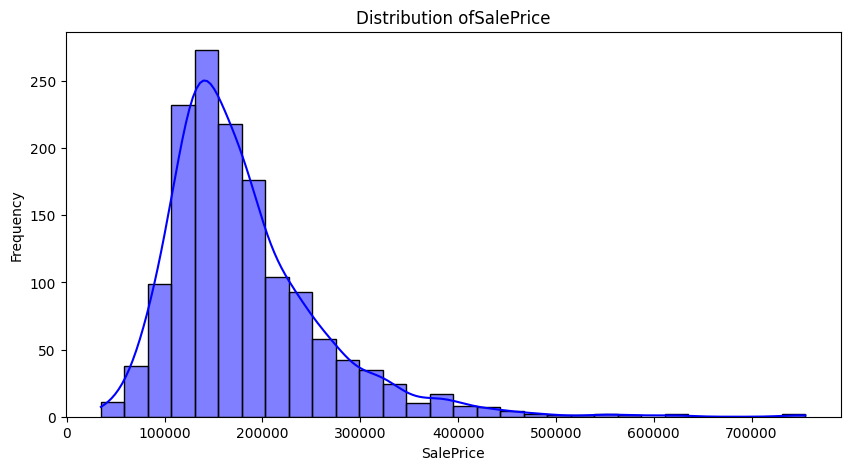

CORRELATION with Target
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64
TOP CORRELATED FEATURES


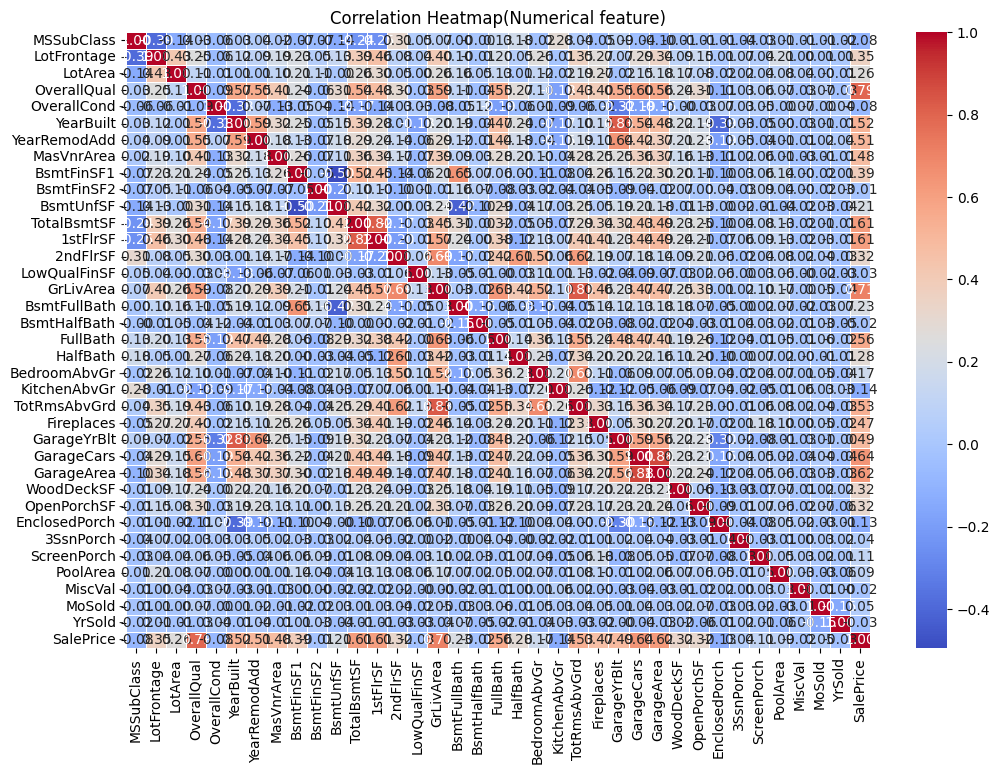

In [ ]:
perform_data_analysis(df,target='SalePrice')

In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

In [ ]:
print("\n\n🔹correlation with target")
numeric_df=df.select_dtypes(include=[np.number])
correlations=numeric_df.corr()['SalePrice'].sort_values(ascending=False)
print(correlations.head(10))



🔹correlation with target
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [ ]:
def impute_numeric_missing_values(df):
  """
  imputes missing values in numeric columns using SimpleImputer(median strategy).

  parameters:
      df(dataframe):input dataframe

  returns:
      dataframe:dataframe with numeric nans filled
  """

  numeric_cols=df.select_dtypes(include=[np.number]).columns
  if not numeric_cols.empty:
    imputer=SimpleImputer(strategy='median')
    df[numeric_cols]=imputer.fit_transform(df[numeric_cols])
  return df

In [ ]:
df=impute_numeric_missing_values(df)

In [ ]:
def impute_categorical_missing_values(df):
  """
  imputes missing values in categorical columns using SimpleImputer(most_frequent strategy).

  parameters:
      df(dataframe):input dataframe

  returns:
      dataframe:dataframe with categorical nans filled
  """
  categorical_cols=df.select_dtypes(exclude=[np.number]).columns
  if not categorical_cols.empty:
    imputer=SimpleImputer(strategy='most_frequent')
    df[categorical_cols]=imputer.fit_transform(df[categorical_cols])
  return df


In [ ]:
df=impute_categorical_missing_values(df)

In [ ]:
def impute_categorical_missing_values(df):
  """
  imputes missing values in categorical columns using SimpleImputer(most_frequent strategy).

  parameters:
      df(dataframe):input dataframe

  returns:
      dataframe:dataframe with categorical nans filled
  """
  categorical_cols=df.select_dtypes(exclude=[np.number]).columns
  if not categorical_cols.empty:
    imputer=SimpleImputer(strategy='most_frequent')
    df[categorical_cols]=imputer.fit_transform(df[categorical_cols])
  return df

In [ ]:
df=impute_categorical_missing_values(df)

In [ ]:
import seaborn as snsmp
import matplotlib.pyplot as plt

def plot_numeric_columns(df,target=None,cols_per_row=3):
  """
  plots hoistogram and scatterplots for numeric columns.

  parameters:
      df(dataframe):input data
      target(str or None):target column name(e.g.,'SalePrice')
      cols_per_row(int):number of plot per row
  """
  numeric_cols=df.select_dtypes(include=[float,int]).columns.tolist()

  if target and target in numeric_cols:
    numeric_cols.remove(target)
  print(f"🔹found{len(numeric_cols)}numeric columns.")

  #histograms
  print("\n 📊numeric columns:distribution")
  for i in range(0,len(numeric_cols),cols_per_row):
      subset=numeric_cols[i:i+cols_per_row]
      fig,axes=plt.subplots(1,len(subset),figsize=(5*len(subset),4))
      if len(subset)==1:
        axes=[axes]

      for ax,col in zip(axes,subset):
        sns.histplot(df[col],kde=True,bins=30,ax=ax)
        ax.set_title(f'distribution of{col}')
      plt.tight_layout()
      plt.show()

  #scatter plots vs target
  if target and target in df.columns:
    print("\n📈 numeric columns:scatter plot vs target")
    for i in range(0,len(numeric_cols),cols_per_row):
        subset=numeric_cols[i:i+cols_per_row]
        fig,axes=plt.subplots(1,len(subset),figsize=(5*len(subset),4))
        if len(subset)==1:
           axes=[axes]

        for ax,col in zip(axes,subset):
            sns.scatterplot(x=df[col],y=df[target],ax=ax)
            ax.set_title(f'{col} vs {target}')
        plt.tight_layout()
        plt.show()




🔹found36numeric columns.

 📊numeric columns:distribution


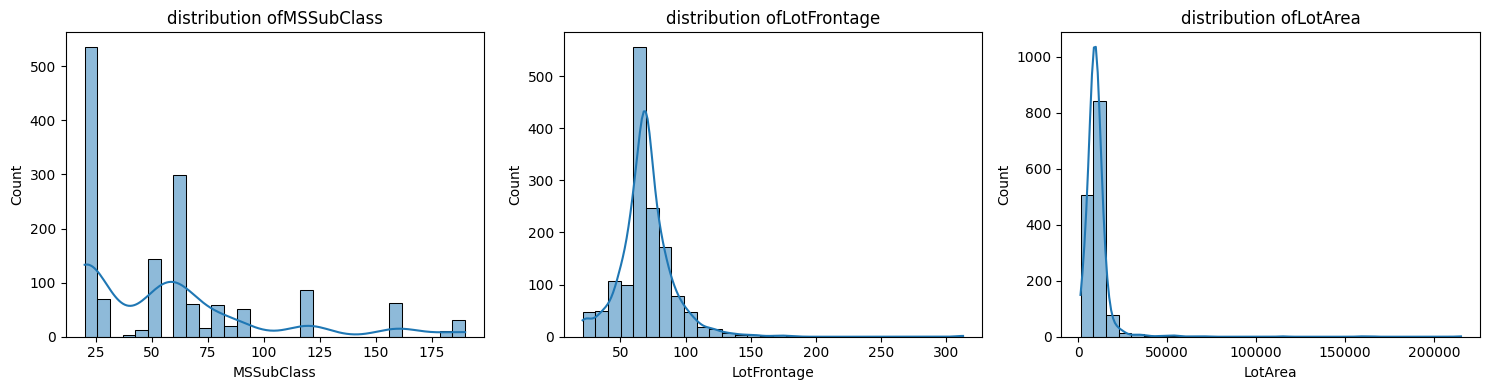

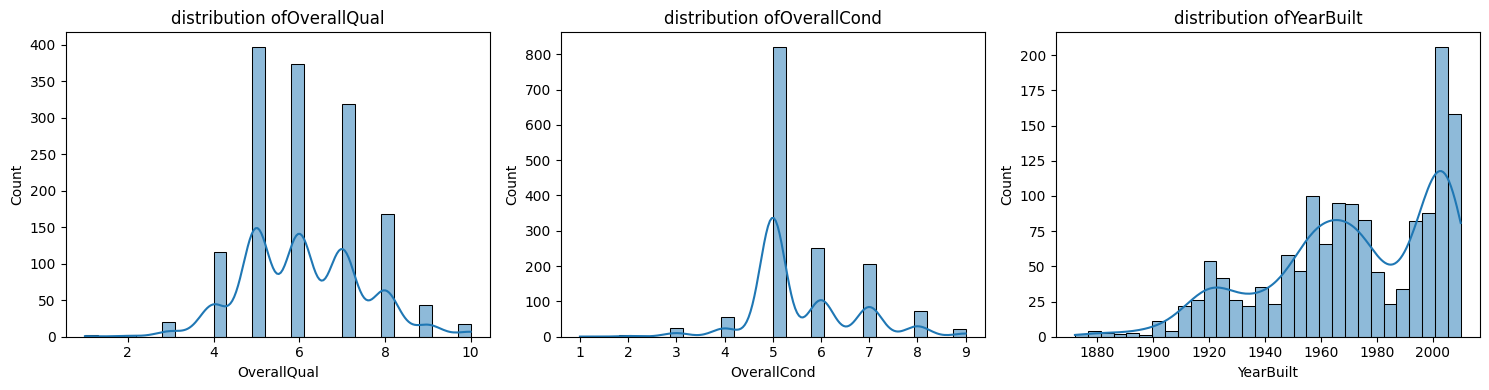

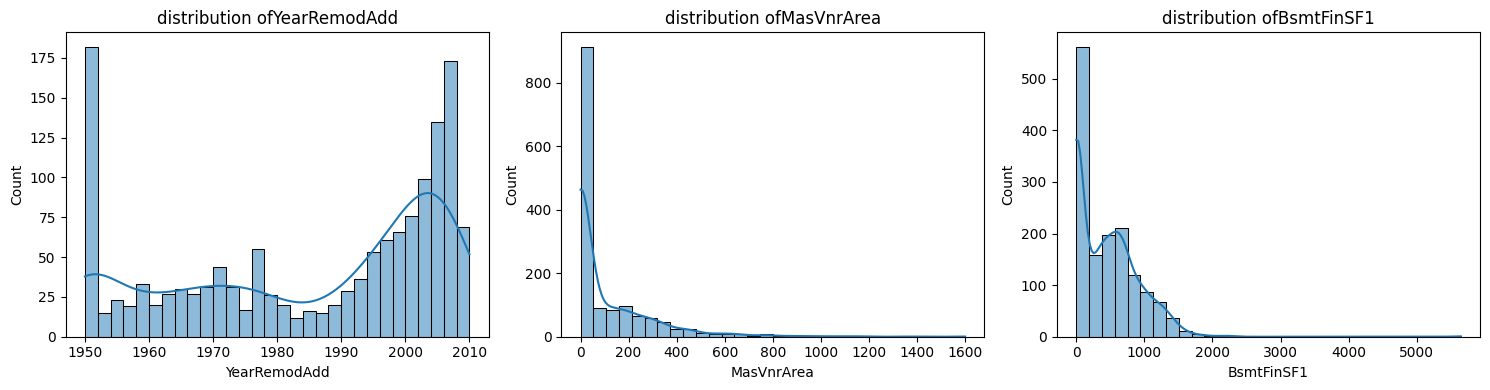

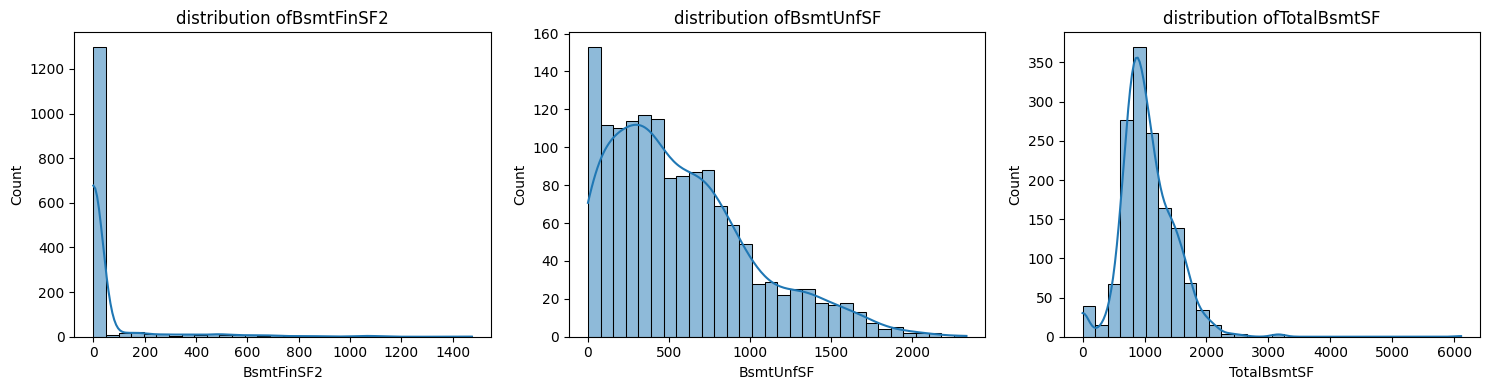

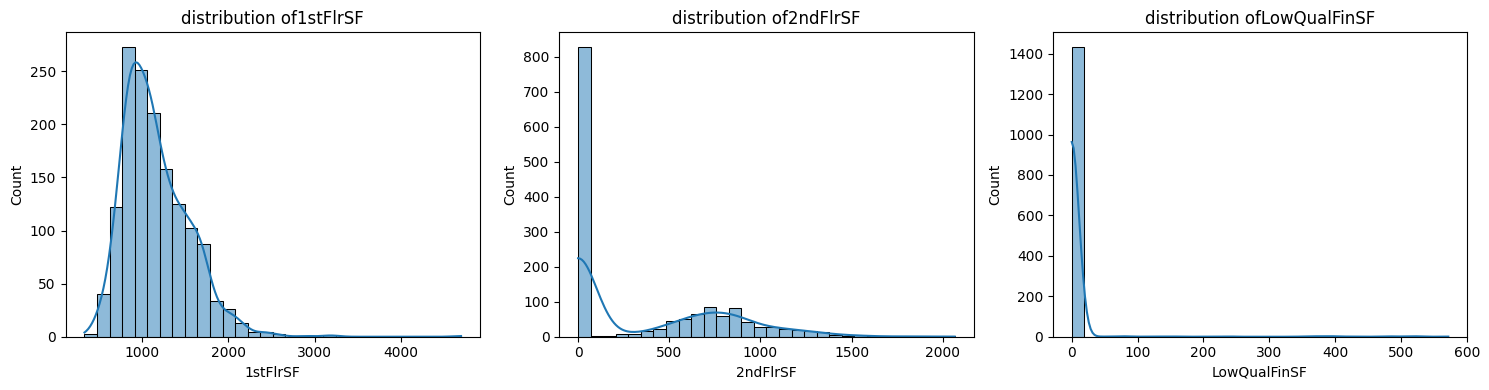

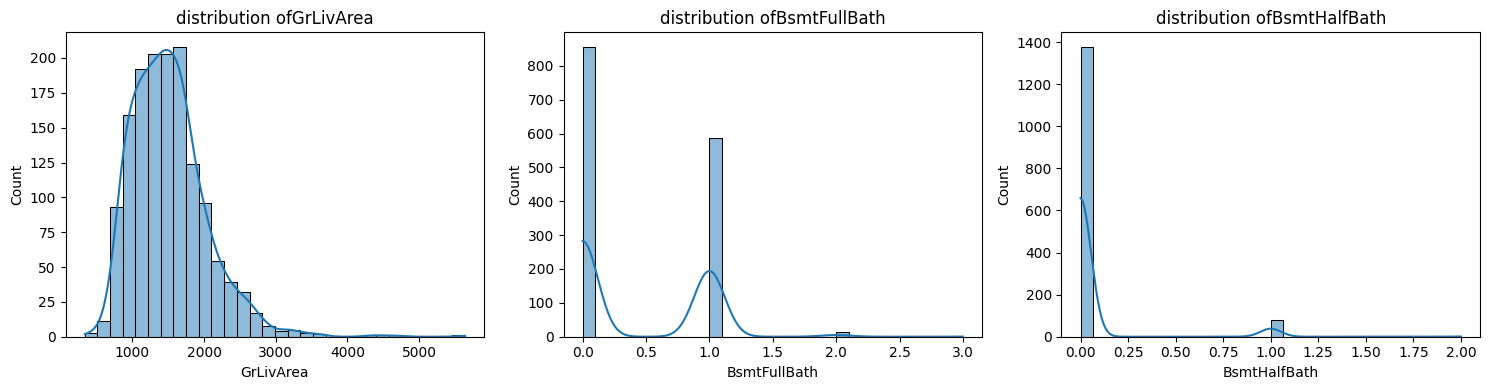

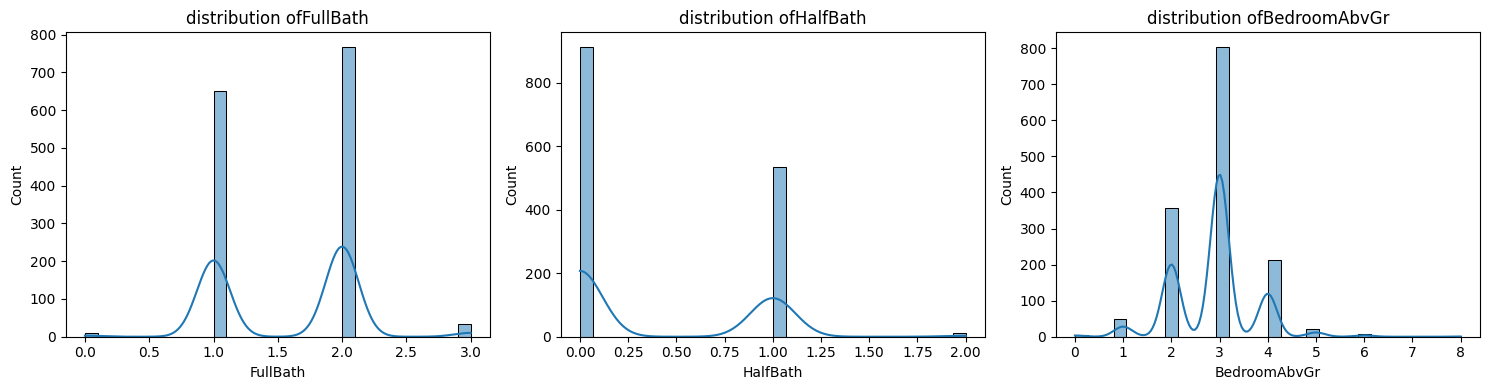

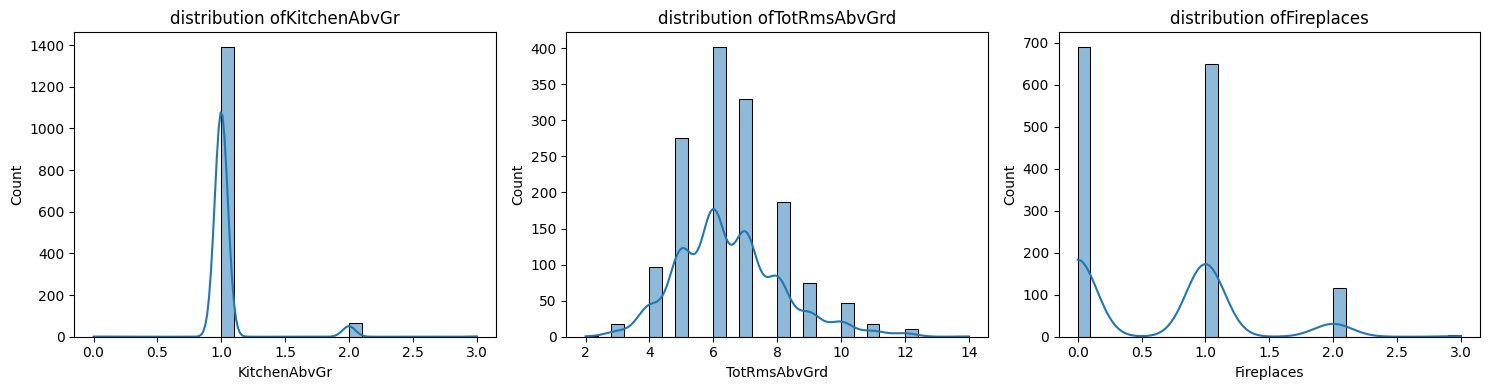

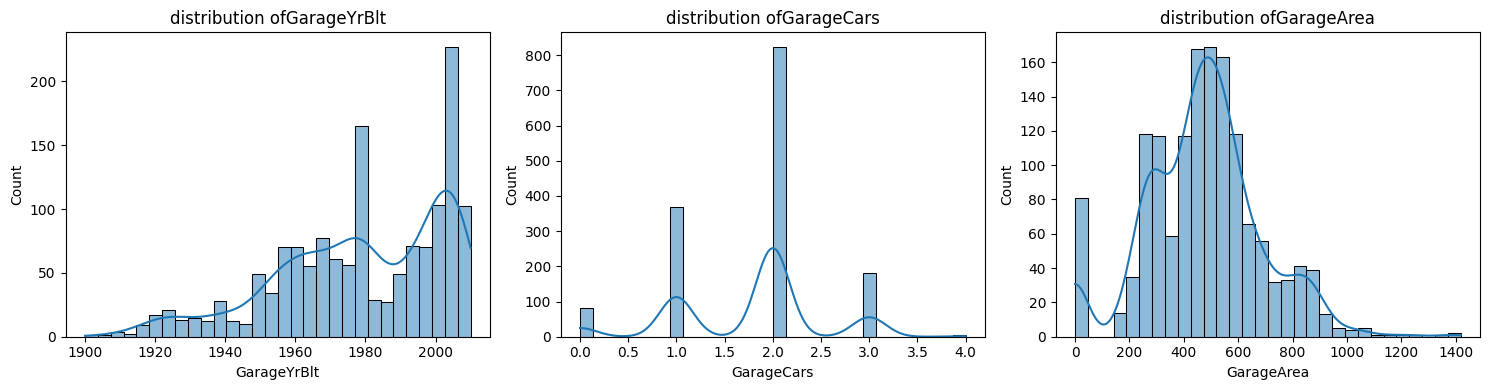

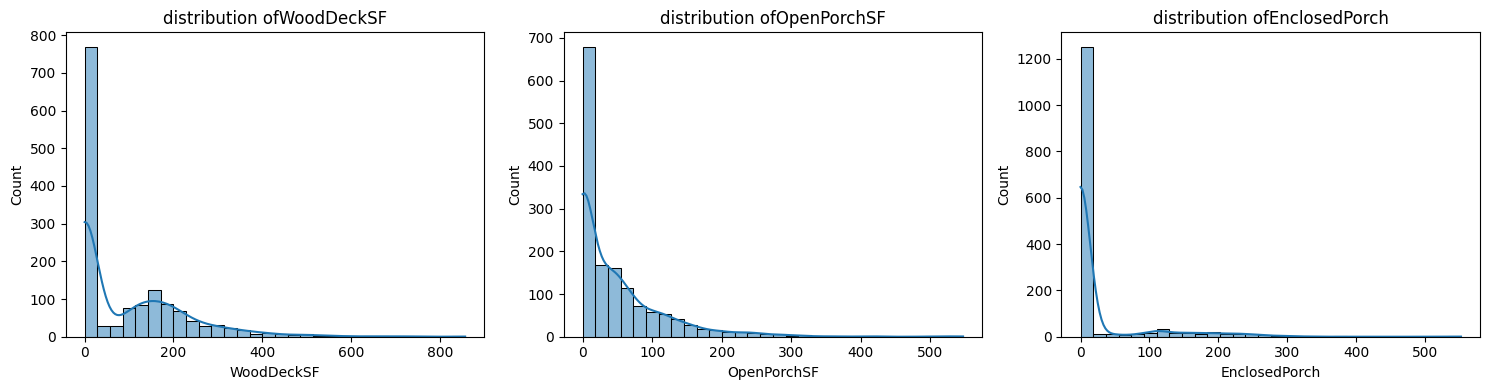

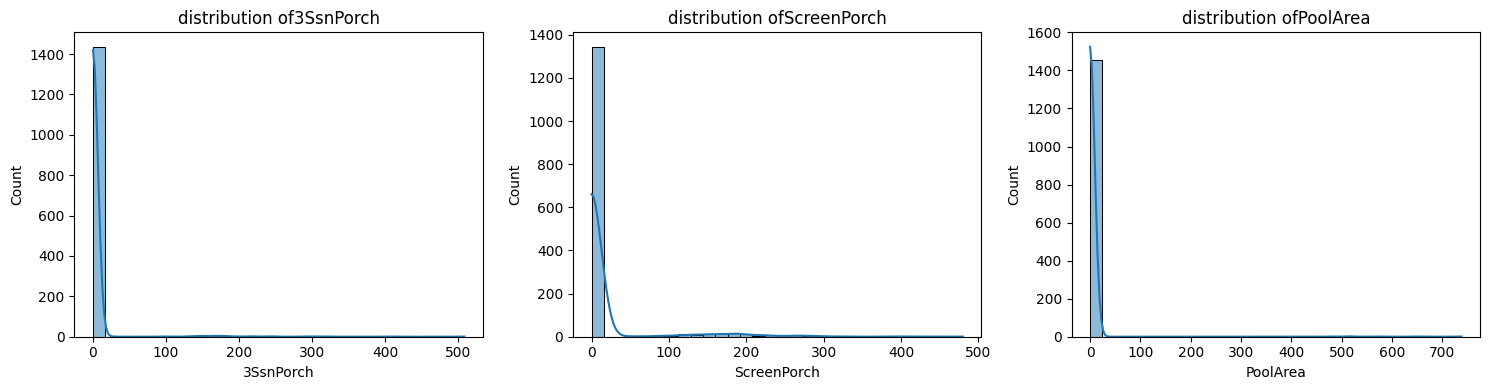

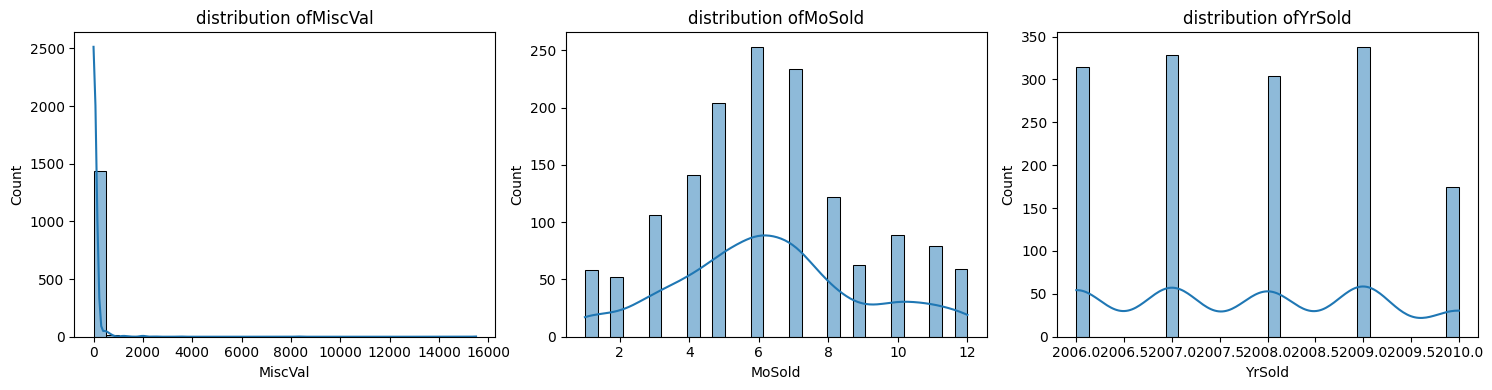


📈 numeric columns:scatter plot vs target


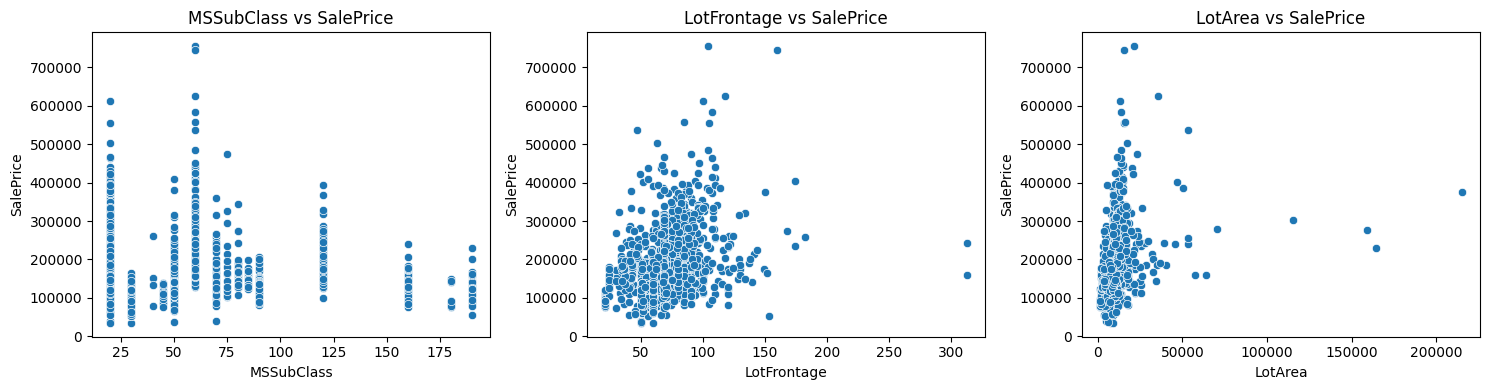

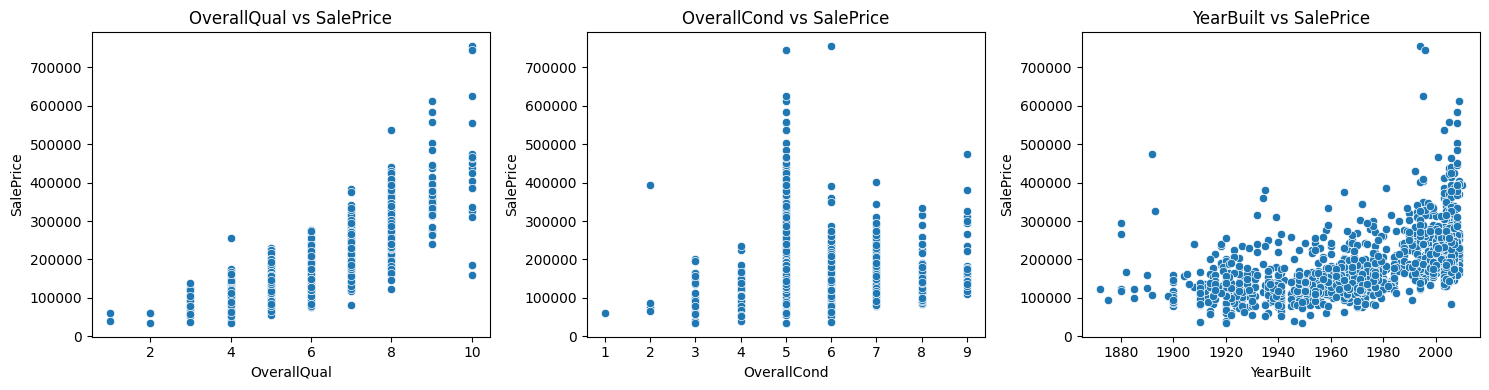

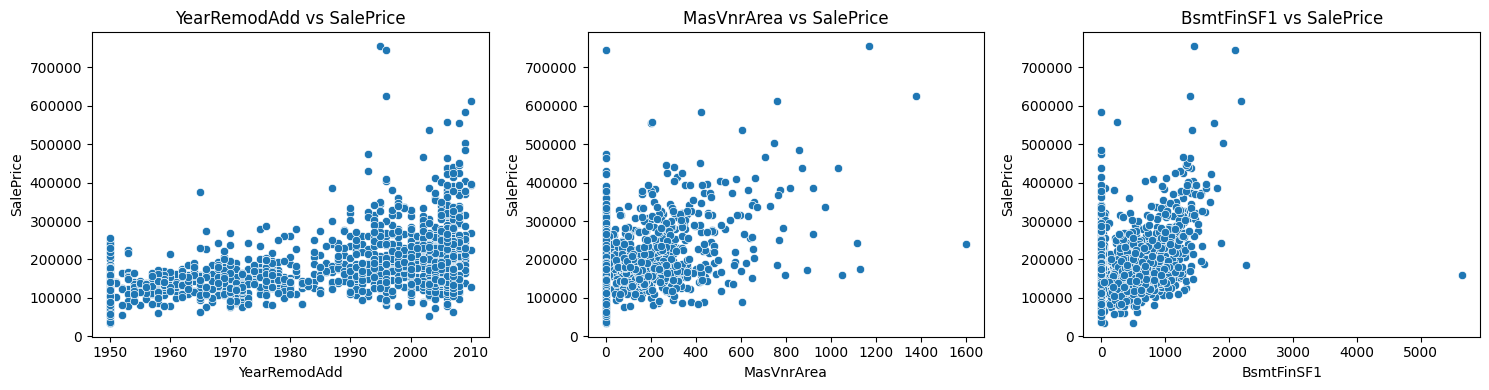

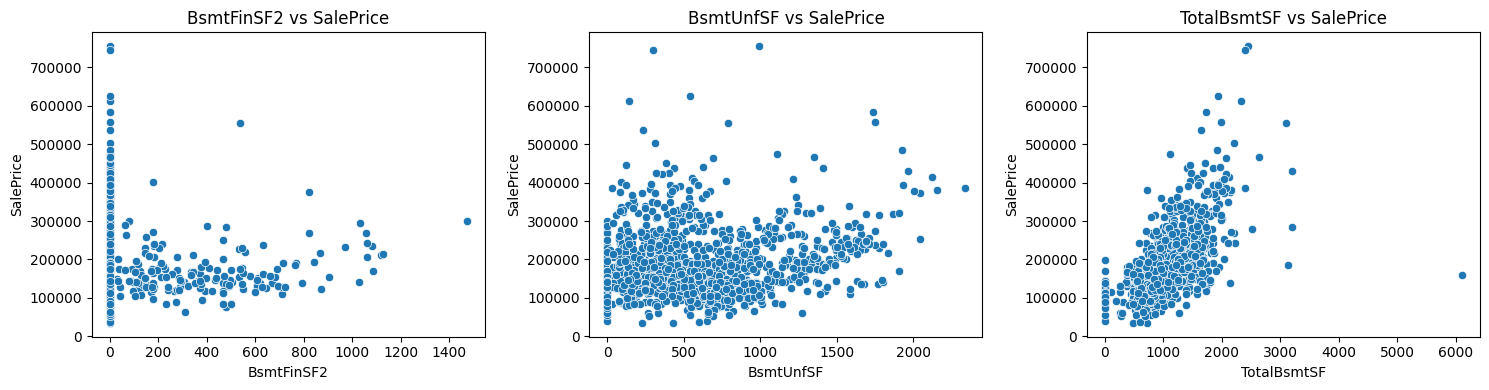

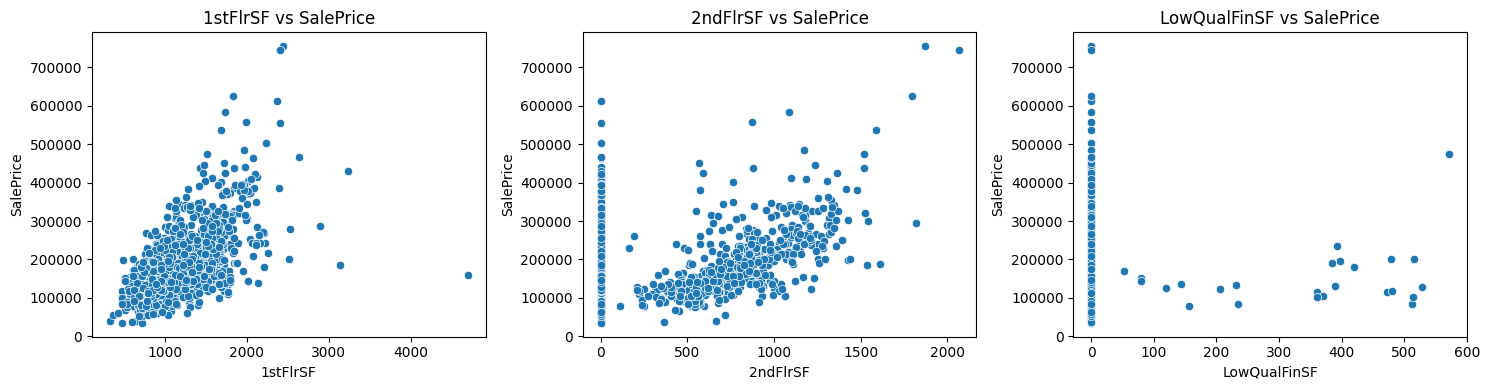

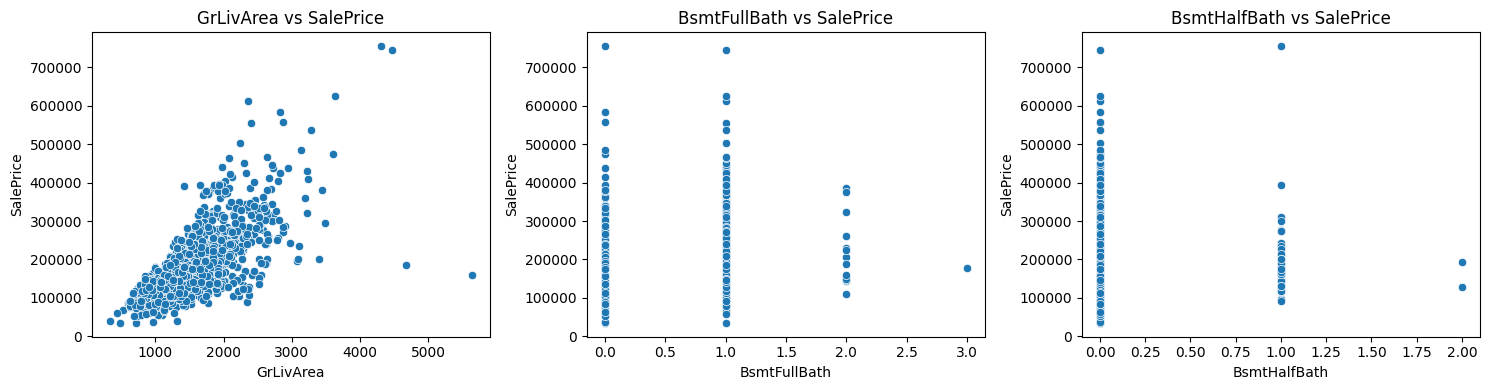

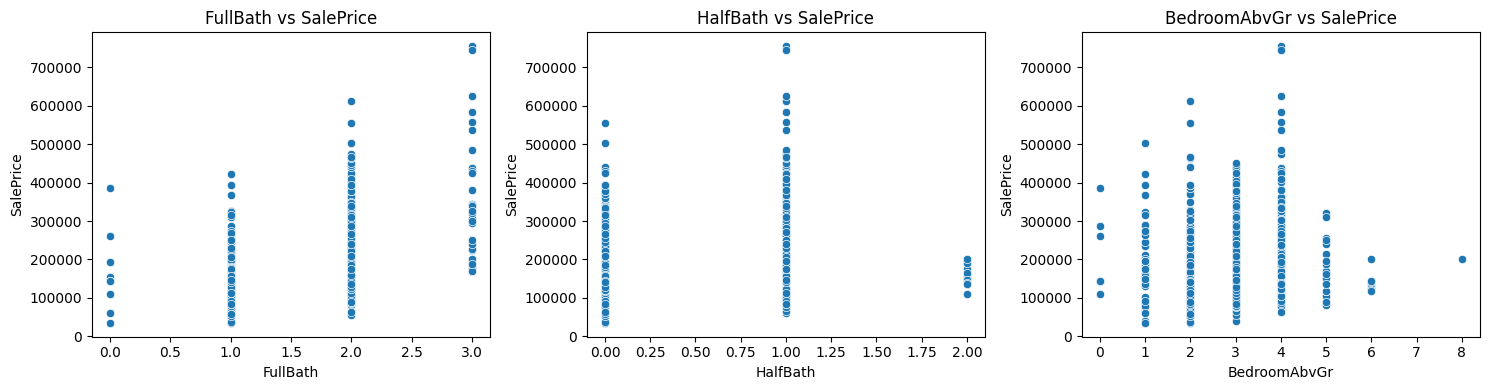

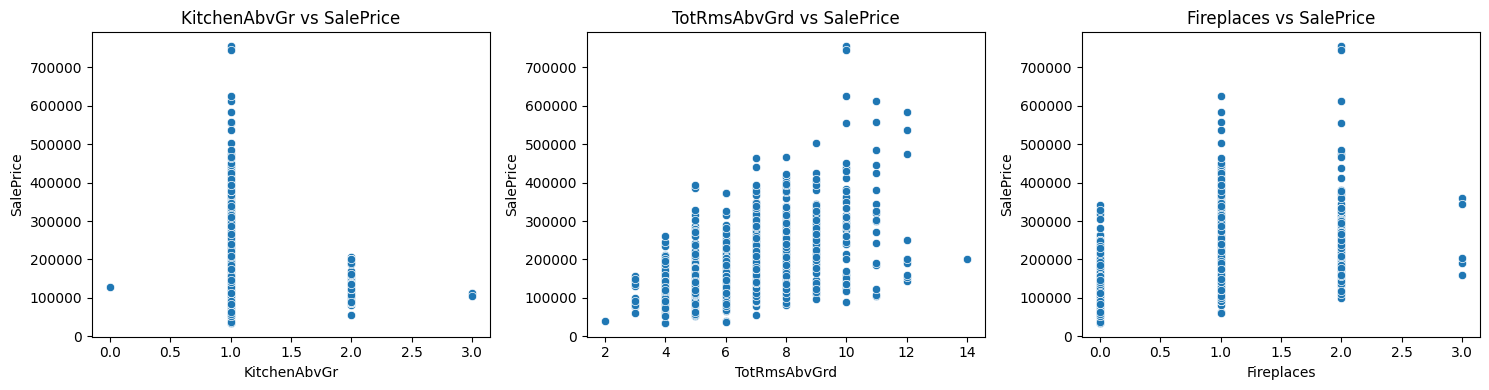

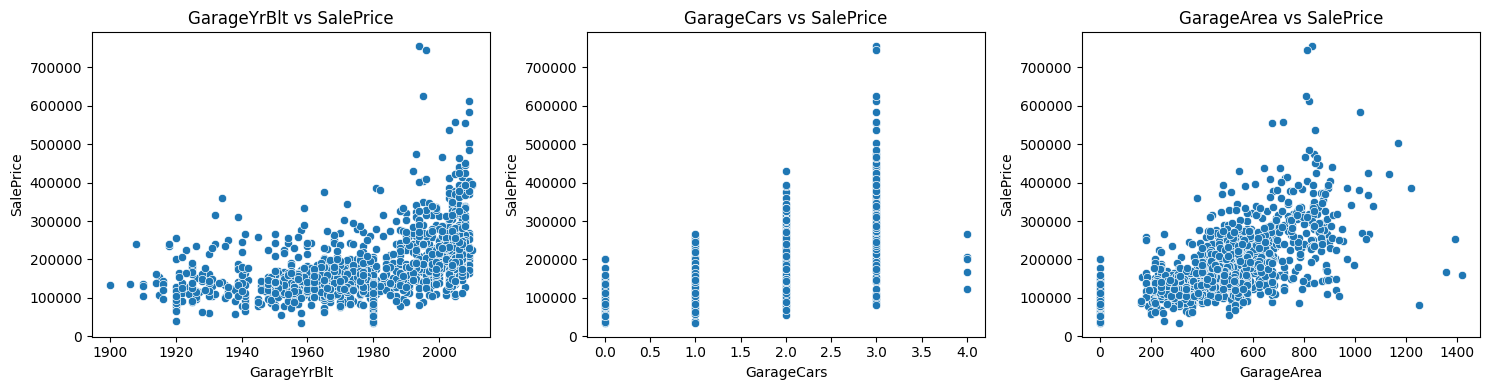

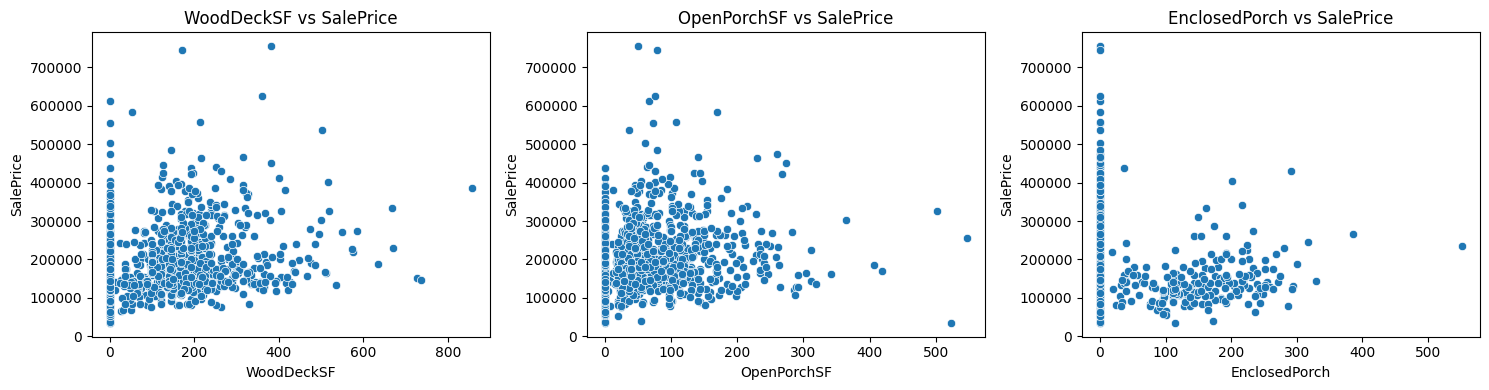

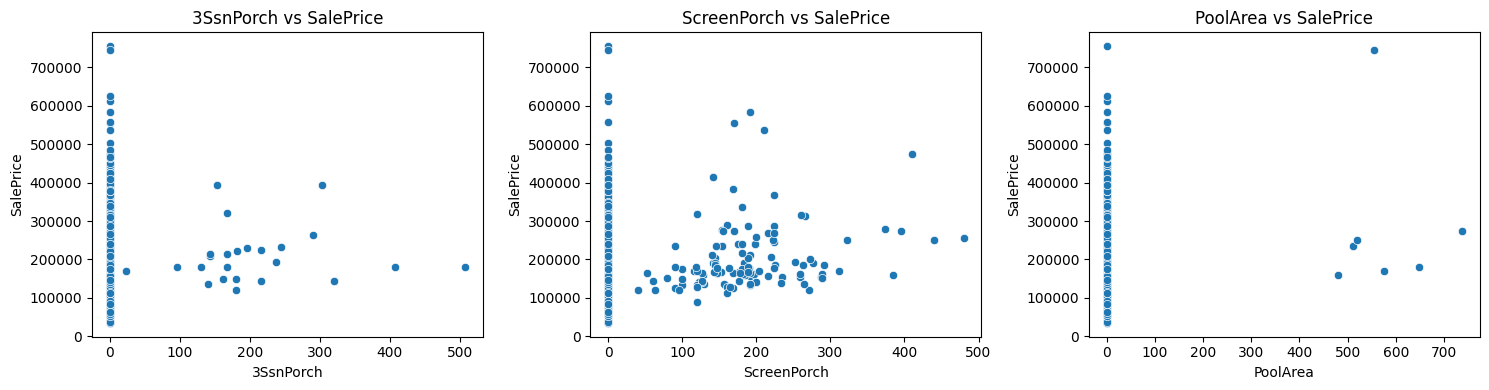

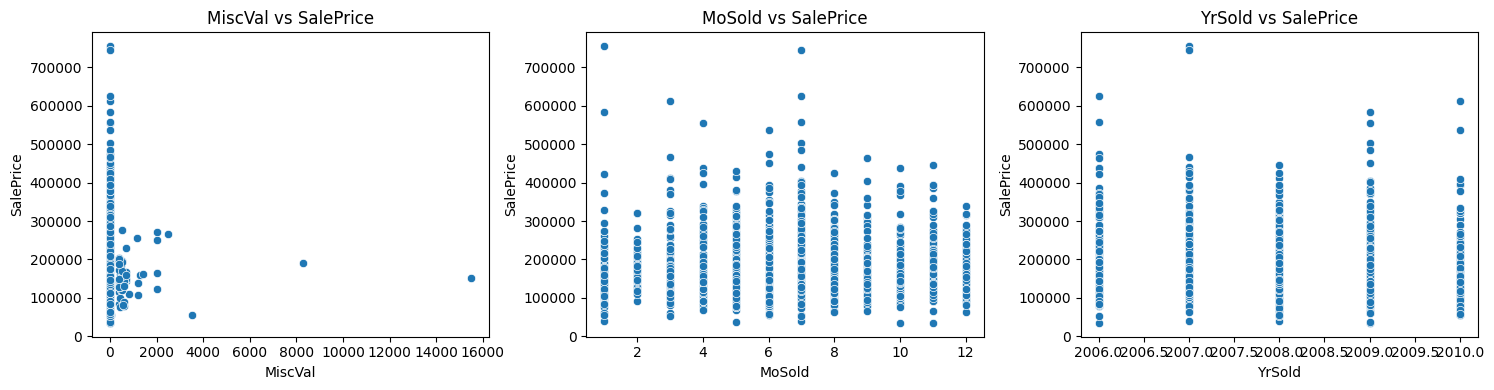

In [ ]:
plot_numeric_columns(df,target="SalePrice", cols_per_row=3)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_categorical_columns(df,target=None,cols_per_row=3):
  """
  Plots countplots and boxplots for categorical columns.
  Parameters:
     df (DataFrame):Input data
     target (str or None):Target column name(e.g.,'SalePrice')
     cols_per_row (int):Number of plots per row
  """
  categorical_cols = df.select_dtypes(exclude=[float,int]).columns.tolist()

  if target and target in categorical_cols:
    categorical_cols.remove(target)
    print(f"Found {len(categorical_cols)} categorical columns.")

    #Countplots
    print("\n Categorical Columns: Countplot")
    for i in range(0,len(categorical_cols),cols_per_row):
      subset = categorical_cols[i:i+cols_per_row]
      fig,axes = plt.subplots(1,len(subset),figsize=(5*len(subset),4))
      if len(subset) == 1:
        axes = [axes]
      for ax,col in zip(axes,subset):
        top_categories = df[col].value_counts().index[:10]
        sns.countplot(data=df[df[col].isin(top_categories)],x=col,order=top_categories,ax=ax)
        ax.set_title(f'Countplot of {col}')
        ax.tick_params(axis='x',rotation=45)#Safe label rotation
      plt.tight_layout()
      plt.show()
  #Boxplots vs Target
  if target and target in df.columns:
    print("\n Categorical Columns: Boxplot vs Target")
    for i in range(0,len(categorical_cols),cols_per_row):
      subset = categorical_cols[i:i+cols_per_row]
      fig,axes = plt.subplots(1,len(subset),figsize=(5*len(subset),5))
      if len(subset)== 1:
        axes = [axes]
      for ax,col in zip(axes,subset):
        top_categories = df[col].value_counts().index[:10]
        sns.boxplot(x=df[col],y=df[target],data=df[df[col].isin(top_categories)],ax=ax)
        ax.set_title(f'{target} by{col}')
        ax.tick_params(axis='x',rotation=45)#Safe label rotation
      plt.tight_layout()
      plt.show()



 Categorical Columns: Boxplot vs Target


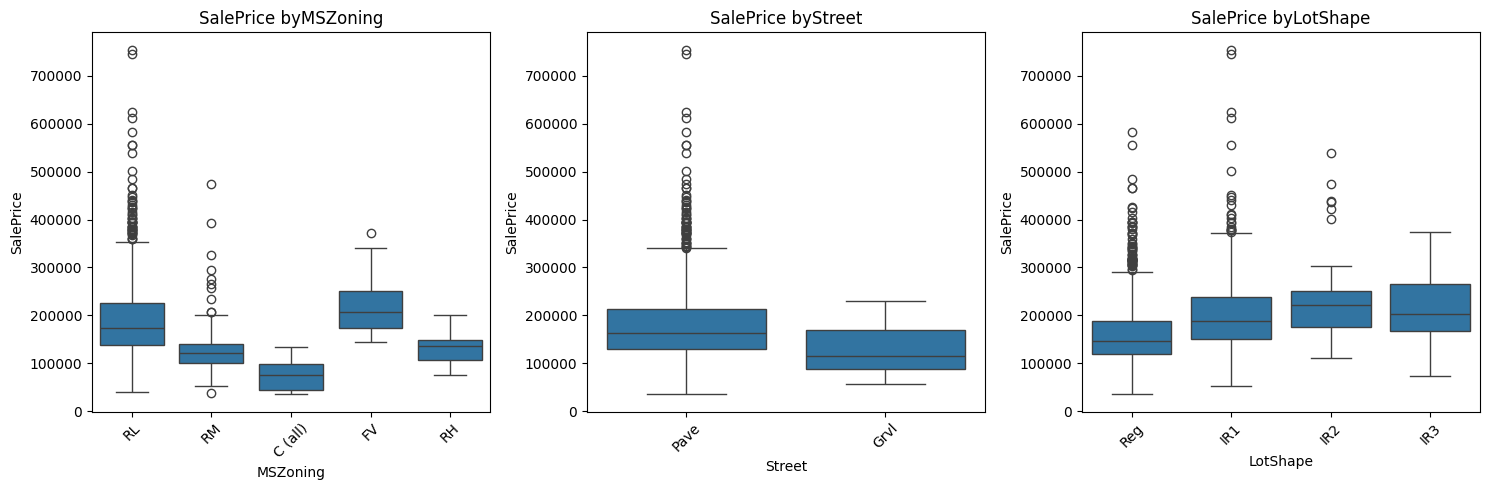

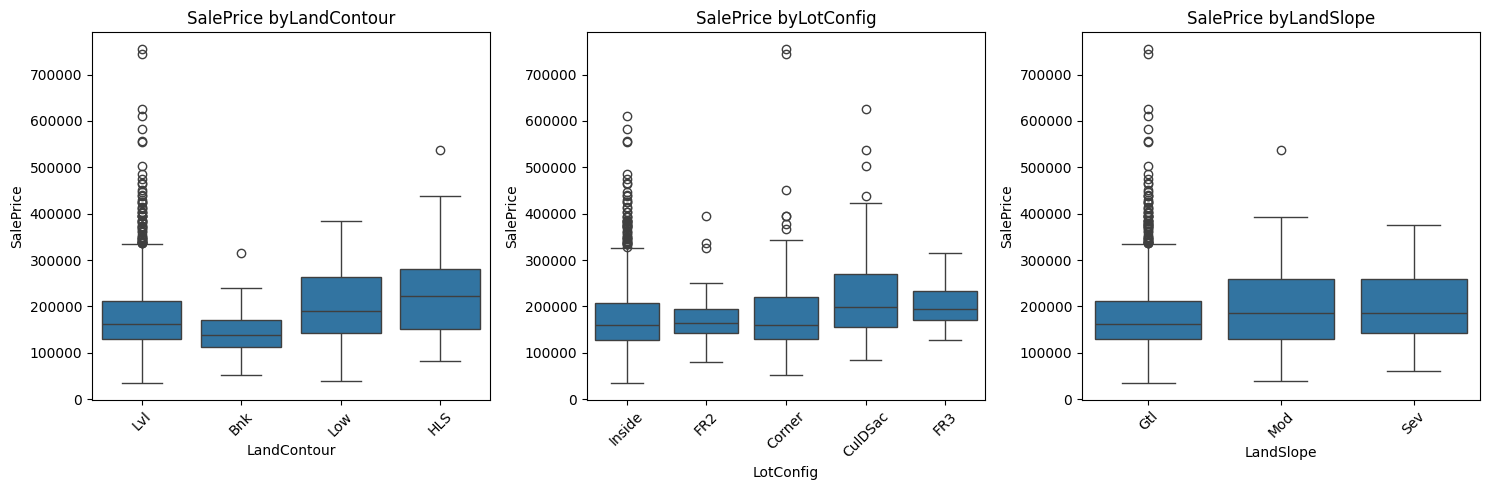

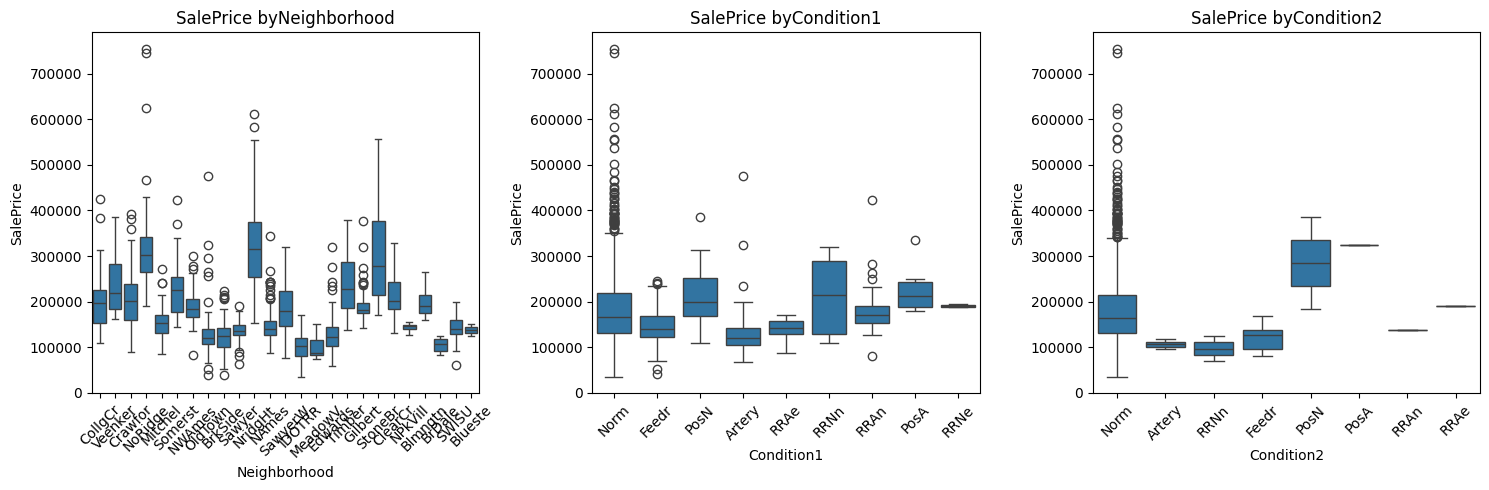

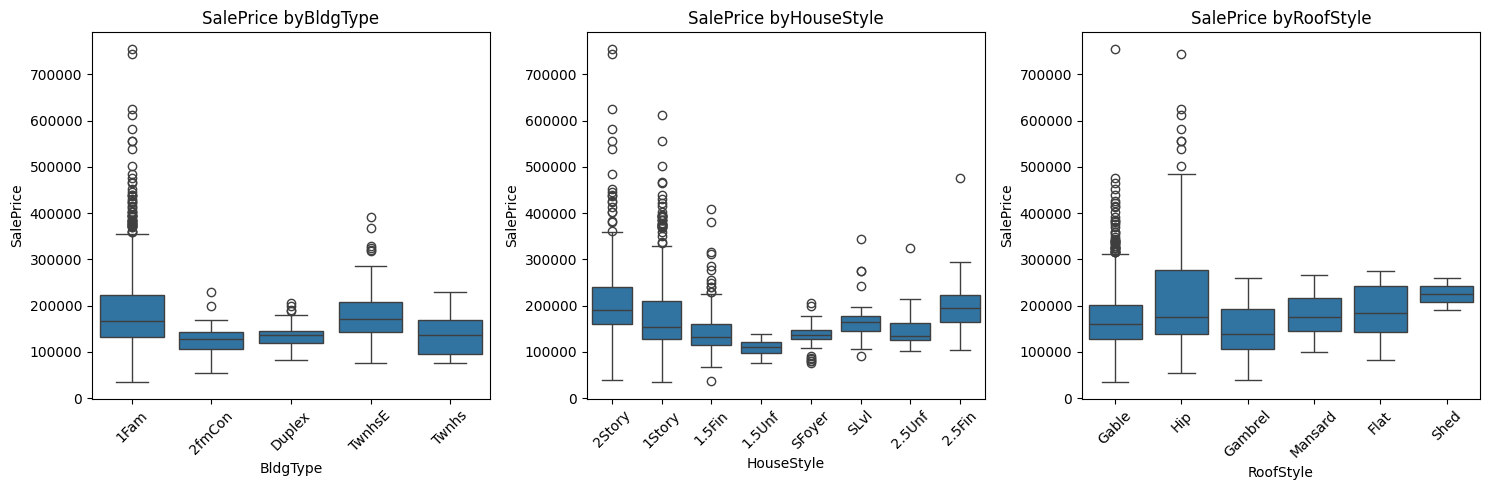

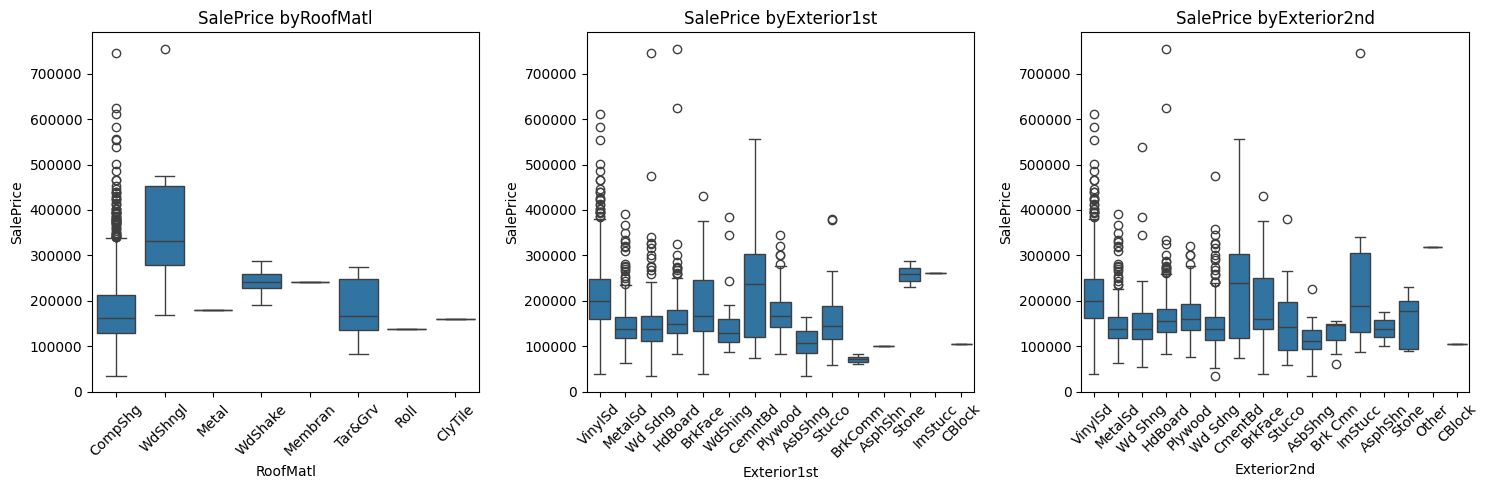

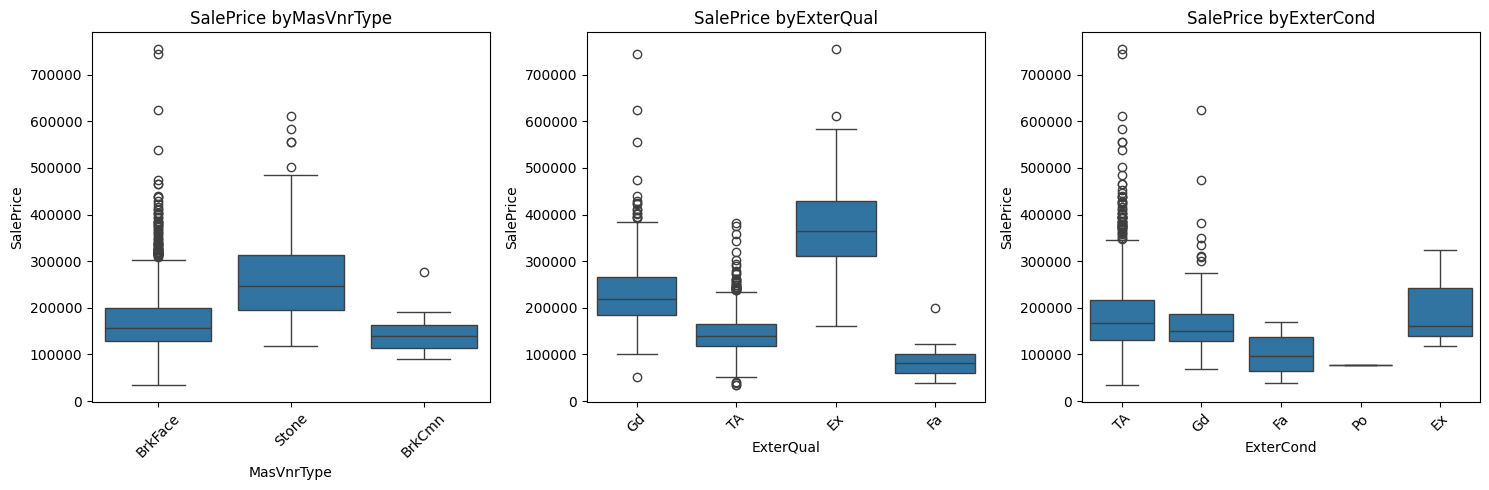

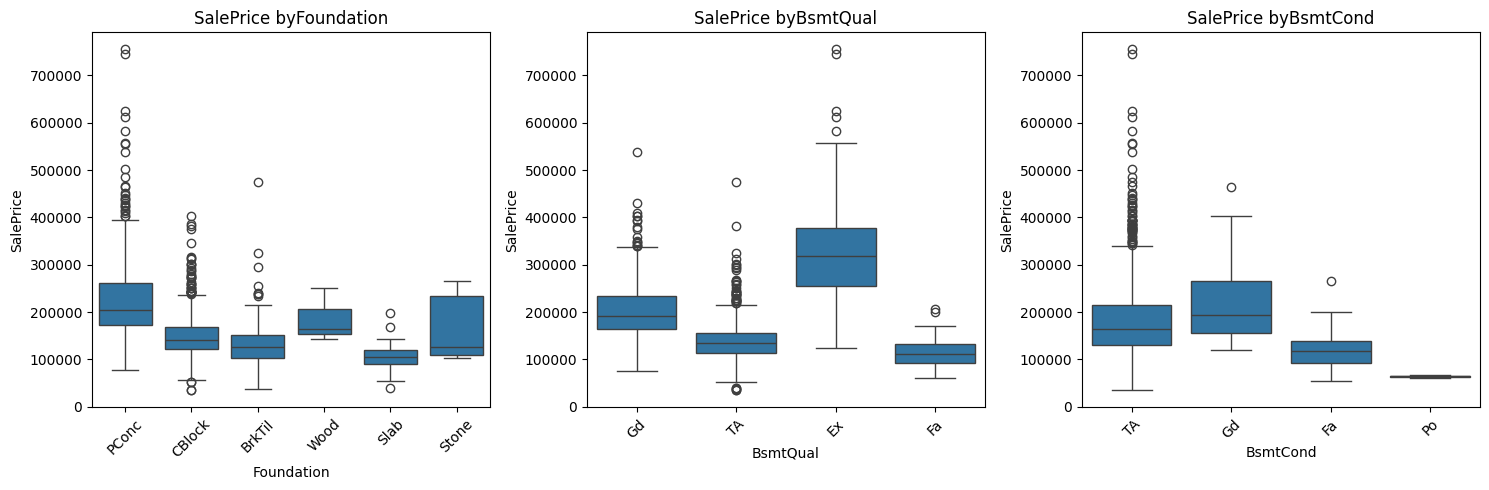

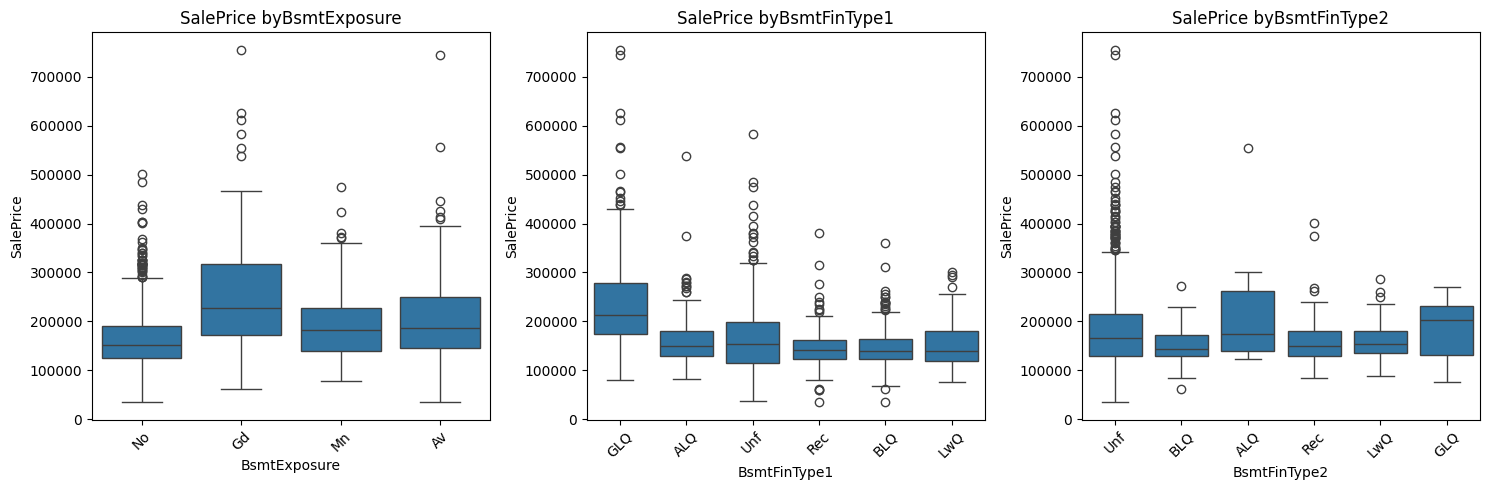

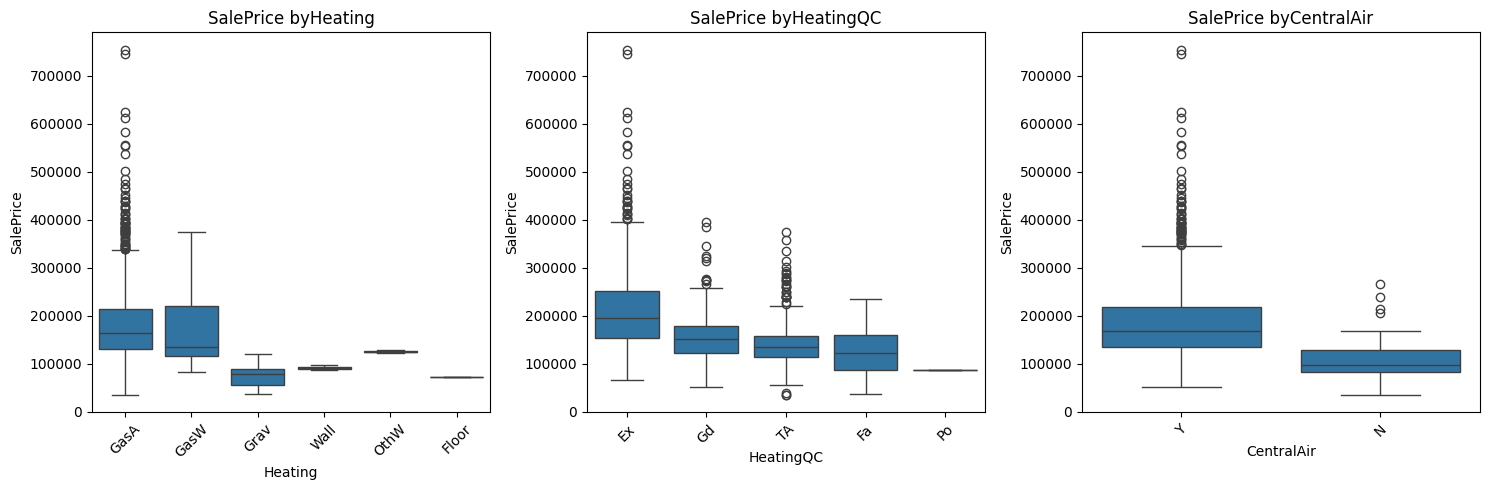

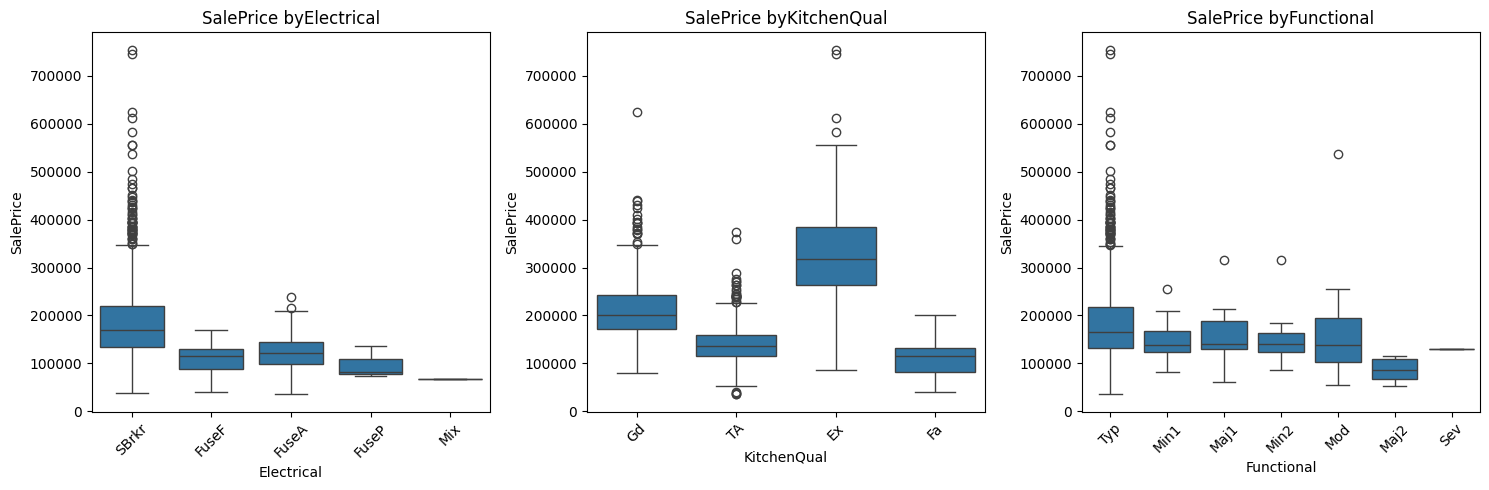

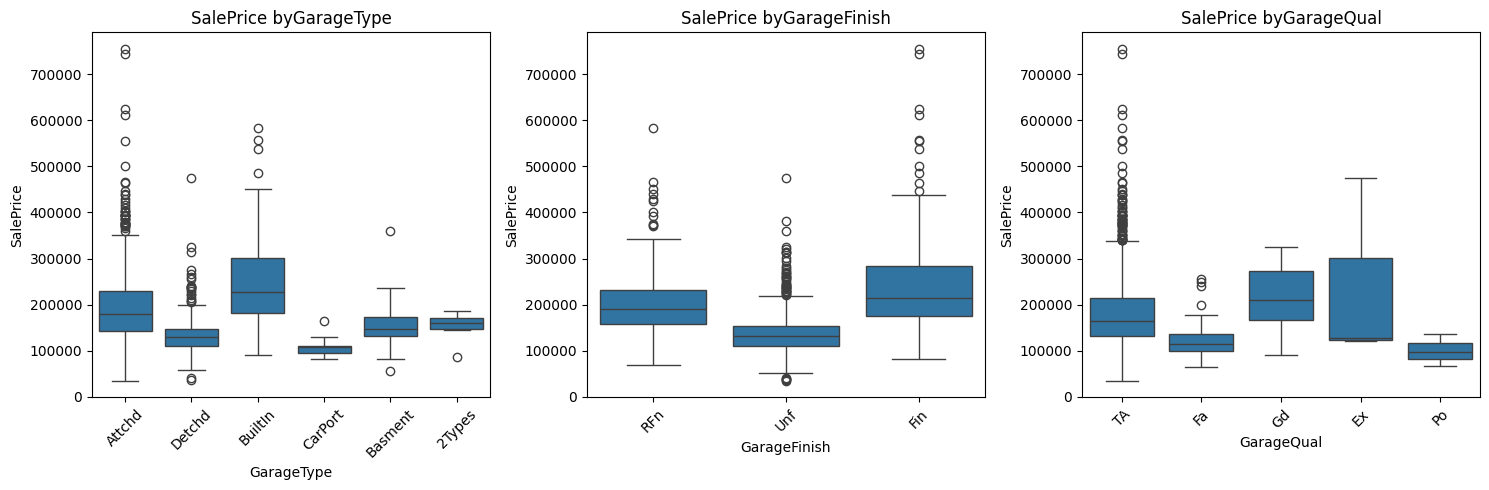

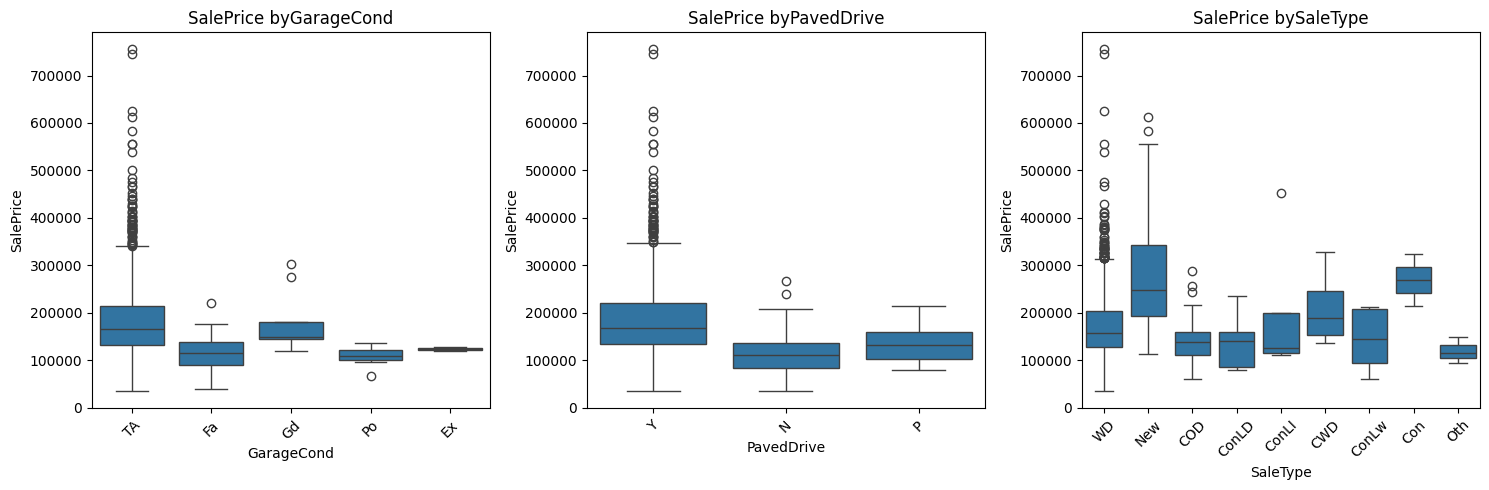

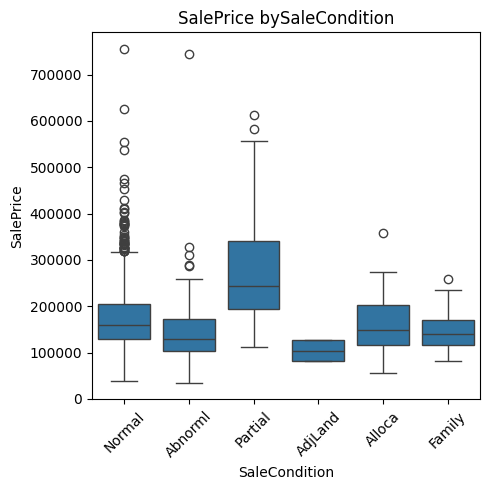

In [ ]:
plot_categorical_columns(df,target="SalePrice",cols_per_row=3)

In [ ]:
# Age of house at sale
df['AgeAtSale']=df['YrSold']-df['YearBuilt']
#Total bathrooms
df['TotalBathrooms']=(
    df['FullBath']+
    0.5 * df['HalfBath']+
    df['BsmtFullBath']+
    0.5 * df['BsmtFullBath']
)
# Has Garage or Not (binary flag)
df['HasGarage']=df['GarageArea'].apply(lambda x:1 if x>0 else 0)
#Has basement(1 if totalBsmtSF>0)
df['HasBasement']=df['TotalBsmtSF'].apply(lambda x:1 if x>0 else 0)
#Has FIREplace(1 if Fireplace >0)
df['Fireplaces'] = df['Fireplaces'].fillna(0)
df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
#Has Pool(1 if PoolArea>0)
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
#Total porch area
df['TotalPorchSF']=(   #index
    df['OpenPorchSF']+
    df['EnclosedPorch']+
    df['ScreenPorch']
)
#Has pool
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# Combine rare categories in 'neighborhood '(optonal)
neighborhood_counts=df['Neighborhood'].value_counts()
rare_neighborhoods=neighborhood_counts[neighborhood_counts<10].index
df['Neighborhood']=df['Neighborhood'].replace(rare_neighborhoods,'Other')
#Drop original engineered columns (optional)
columns_to_drop=['TotalBsmtSF','SecondFlrSF','YearBuilt','YrSold',
              'BsmtFullBath','ScreenPorch','OpenPorchSF','EnclosedPorch','PoolArea','Fireplace','GarageArea',
              'FullBath','HalfBath','BsmtHalfBath']
df = df.drop(columns=columns_to_drop,axis=1,errors='ignore')
#Check the new features
print("New Features Created:")
print(df[['AgeAtSale','TotalBathrooms','TotalPorchSF','HasPool','HasFireplace','HasBasement']].head())

New Features Created:
   AgeAtSale  TotalBathrooms  TotalPorchSF  HasPool  HasFireplace  HasBasement
0        5.0             4.0          61.0        0             0            1
1       31.0             2.0           0.0        0             1            1
2        7.0             4.0          42.0        0             1            1
3       91.0             2.5         307.0        0             1            1
4        8.0             4.0          84.0        0             1            1


In [ ]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0           60.0       RL         65.0   8450.0   Pave      Reg         Lvl   
1           20.0       RL         80.0   9600.0   Pave      Reg         Lvl   
2           60.0       RL         68.0  11250.0   Pave      IR1         Lvl   
3           70.0       RL         60.0   9550.0   Pave      IR1         Lvl   
4           60.0       RL         84.0  14260.0   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455        60.0       RL         62.0   7917.0   Pave      Reg         Lvl   
1456        20.0       RL         85.0  13175.0   Pave      Reg         Lvl   
1457        70.0       RL         66.0   9042.0   Pave      Reg         Lvl   
1458        20.0       RL         68.0   9717.0   Pave      Reg         Lvl   
1459        20.0       RL         75.0   9937.0   Pave      Reg         Lvl   

     LotConfig LandSlope Neighborhood  ... SaleType SaleCondition SalePrice  \
0       Inside       Gtl      CollgCr  ...       WD        Normal  208500.0   
1          FR2       Gtl      Veenker  ...       WD        Normal  181500.0   
2       Inside       Gtl      CollgCr  ...       WD        Normal  223500.0   
3       Corner       Gtl      Crawfor  ...       WD       Abnorml  140000.0   
4          FR2       Gtl      NoRidge  ...       WD        Normal  250000.0   
...        ...       ...          ...  ...      ...           ...       ...   
1455    Inside       Gtl      Gilbert  ...       WD        Normal  175000.0   
1456    Inside       Gtl       NWAmes  ...       WD        Normal  210000.0   
1457    Inside       Gtl      Crawfor  ...       WD        Normal  266500.0   
1458    Inside       Gtl        NAmes  ...       WD        Normal  142125.0   
1459    Inside       Gtl      Edwards  ...       WD        Normal  147500.0   

     AgeAtSale  TotalBathrooms  HasGarage  HasBasement HasFireplace HasPool  \
0          5.0             4.0          1            1            0       0   
1         31.0             2.0          1            1            1       0   
2          7.0             4.0          1            1            1       0   
3         91.0             2.5          1            1            1       0   
4          8.0             4.0          1            1            1       0   
...        ...             ...        ...          ...          ...     ...   
1455       8.0             2.5          1            1            1       0   
1456      32.0             3.5          1            1            1       0   
1457      69.0             2.0          1            1            1       0   
1458      60.0             2.5          1            1            0       0   
1459      43.0             3.0          1            1            0       0   

     TotalPorchSF  
0            61.0  
1             0.0  
2            42.0  
3           307.0  
4            84.0  
...           ...  
1455         40.0  
1456          0.0  
1457         60.0  
1458        112.0  
1459         68.0  

[1460 rows x 69 columns]

In [ ]:
from functools import update_wrapper
#Outliers to detect
def detect_outliers_iqr(df,cols,threshold=1.5,cols_per_row=3):
  """
Detects outliers in specified numerical columns using IQR method.
Parameters:
    df(DataFrame): Input DataFrame
    cols(list):List of numeric column names to check for outliers
    threshold (float):IQR multiplier to define outlier boundaries
    cols_per_row(int):Number of boxplots per row for grid layout

Returns:
   dict:Dictionary with column names as keys and lists of outlier indices as values.
  """

  outlier_indices ={}

#Filter valid columns
  valid_cols = [col for col in cols if col in df.columns]
  invalid_cols =[col for col in cols if col not in df.columns]
  for col in invalid_cols:
    print(f"Columns'{col}'not found in DataFrame.")
  print(f"Analyzing {len(valid_cols)} valid numerical columns for outliers")
#Loop over batches for grid layout
  for i in range(0,len(valid_cols),cols_per_row):
    subset = valid_cols[i:i+ cols_per_row]

  #Creating subplot grid
    fig, axes = plt.subplots(1,len(subset),figsize=(6*len(subset),4))
    if len(subset) == 1:
       axes = [axes] # ensure iteration for single subplot
    for ax,col in zip(axes,subset):
       Q1 = df[col].quantile(0.25)
       Q3 = df[col].quantile(0.75)
       IQR = Q3 -Q1
       lower_bound = Q1 - threshold * IQR
       upper_bound = Q3 + threshold *IQR
    # detect outliers
       outliers = df[(df[col]< lower_bound)| (df[col] > upper_bound)].index
       outlier_indices[col] = list (outliers)
       print(f"Found{len(outliers)} outliers in{col}")

    #Boxplot on subplot
       sns.boxplot(x=df[col],ax=ax)
       ax.set_title(f'{col}\n{len(outliers)}outliers')
       ax.grid(True)
  plt.tight_layout()
  plt.show()

Analyzing 32 valid numerical columns for outliers
Found103 outliers inMSSubClass
Found106 outliers inLotFrontage
Found69 outliers inLotArea
Found2 outliers inOverallQual
Found125 outliers inOverallCond
Found0 outliers inYearRemodAdd
Found98 outliers inMasVnrArea
Found7 outliers inBsmtFinSF1
Found167 outliers inBsmtFinSF2
Found29 outliers inBsmtUnfSF
Found20 outliers in1stFlrSF
Found2 outliers in2ndFlrSF
Found26 outliers inLowQualFinSF
Found31 outliers inGrLivArea
Found35 outliers inBedroomAbvGr
Found68 outliers inKitchenAbvGr
Found30 outliers inTotRmsAbvGrd
Found5 outliers inFireplaces
Found1 outliers inGarageYrBlt
Found5 outliers inGarageCars
Found32 outliers inWoodDeckSF
Found24 outliers in3SsnPorch
Found52 outliers inMiscVal
Found0 outliers inMoSold
Found61 outliers inSalePrice
Found8 outliers inAgeAtSale
Found3 outliers inTotalBathrooms
Found81 outliers inHasGarage
Found37 outliers inHasBasement
Found0 outliers inHasFireplace
Found7 outliers inHasPool
Found44 outliers inTotalPorchS

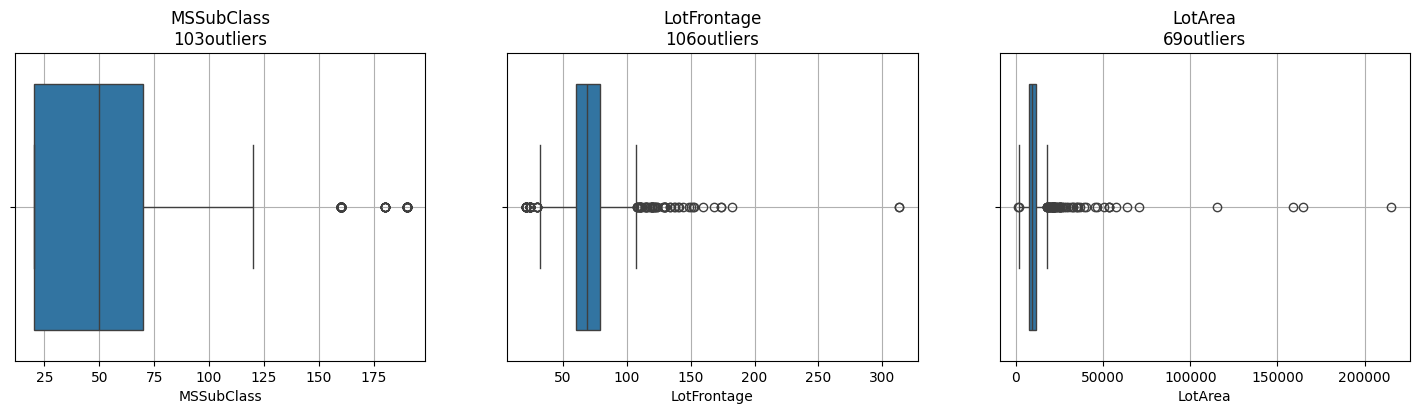

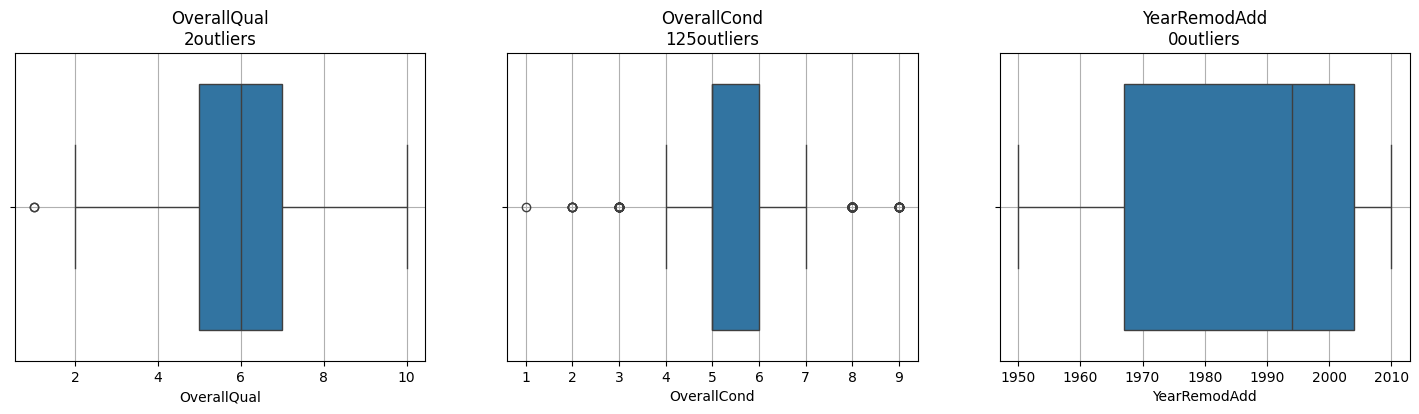

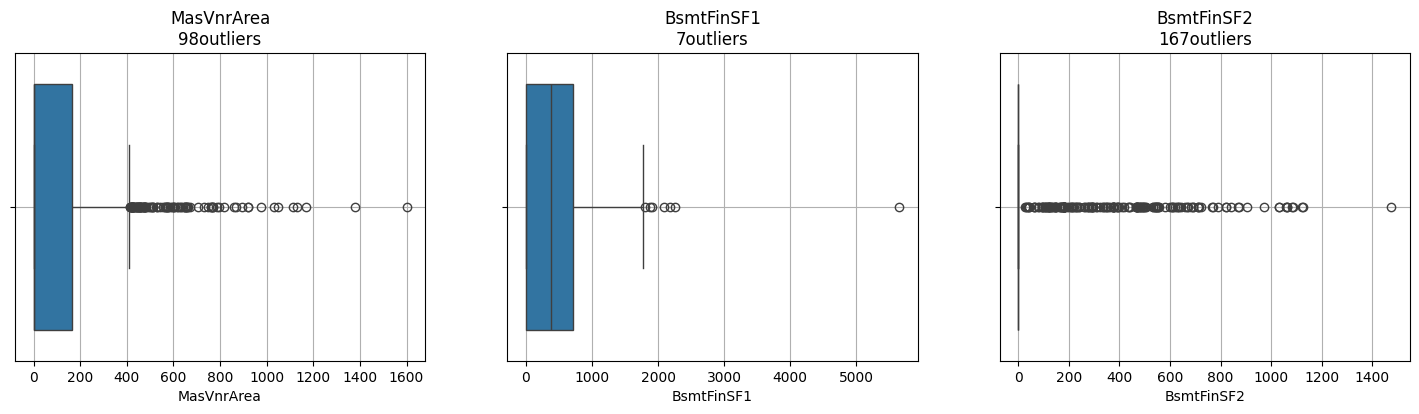

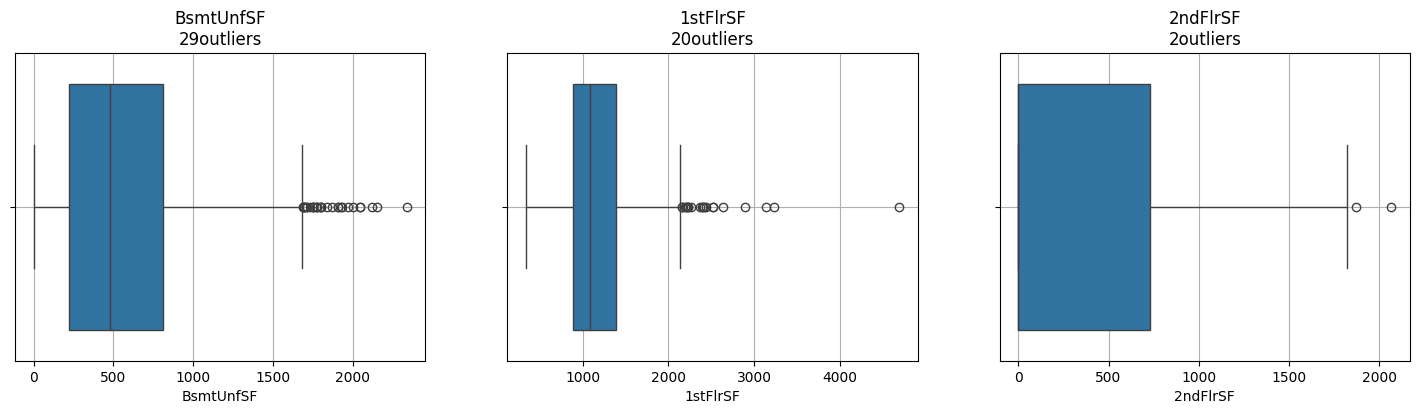

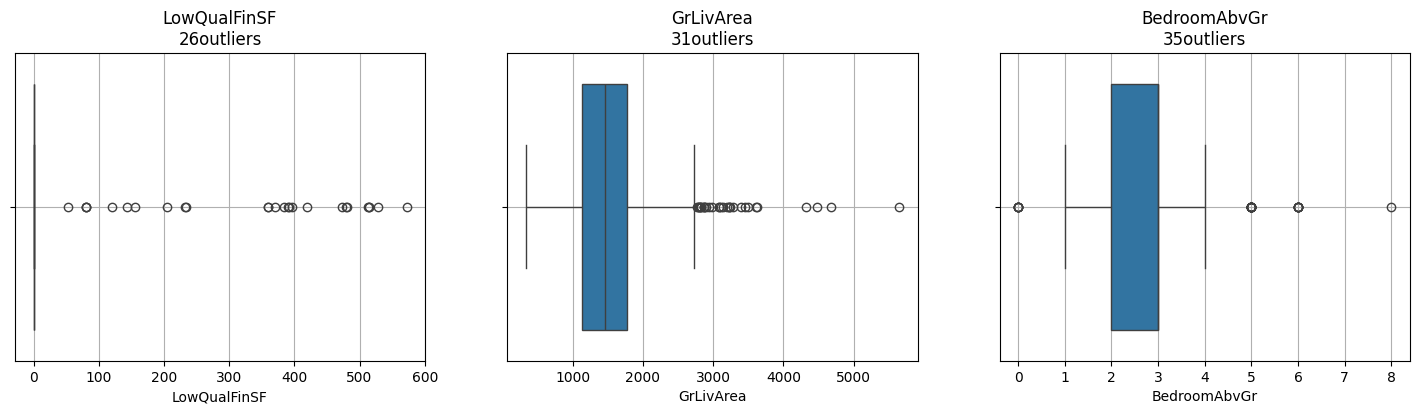

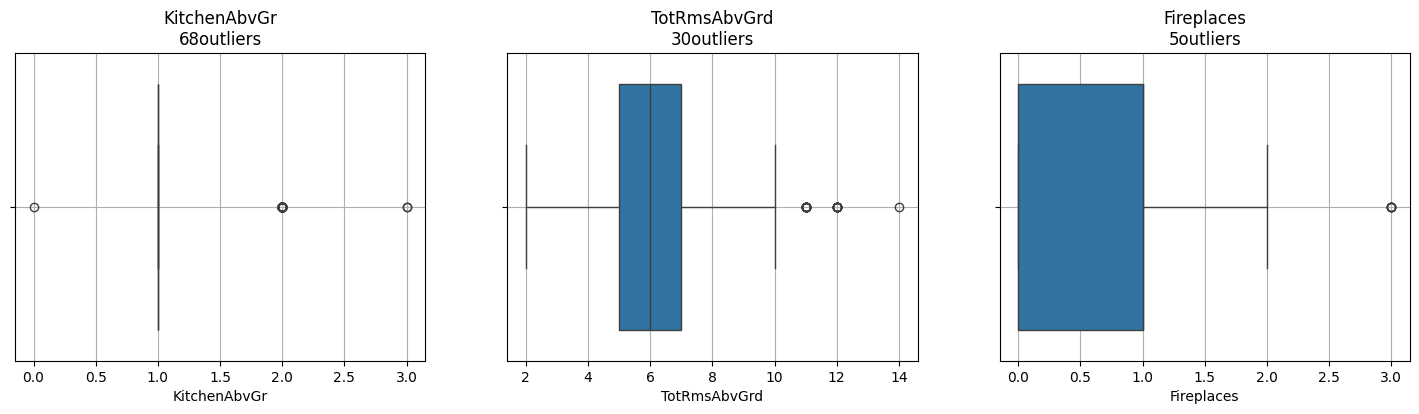

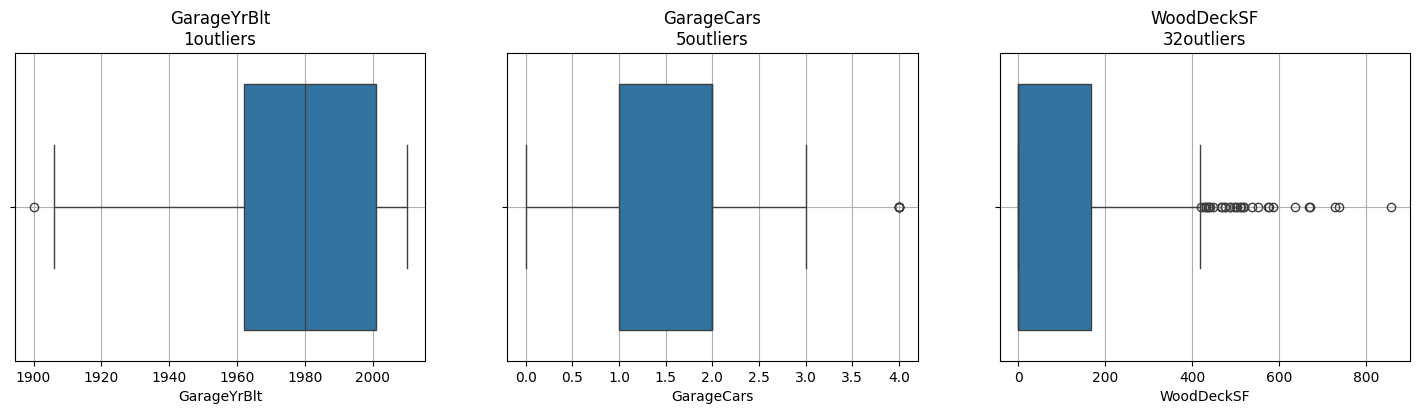

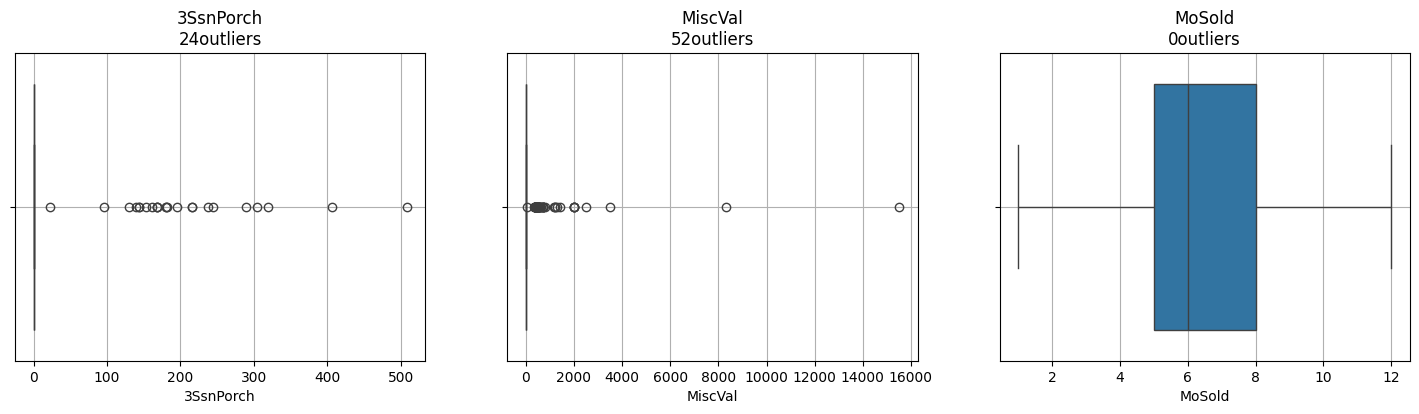

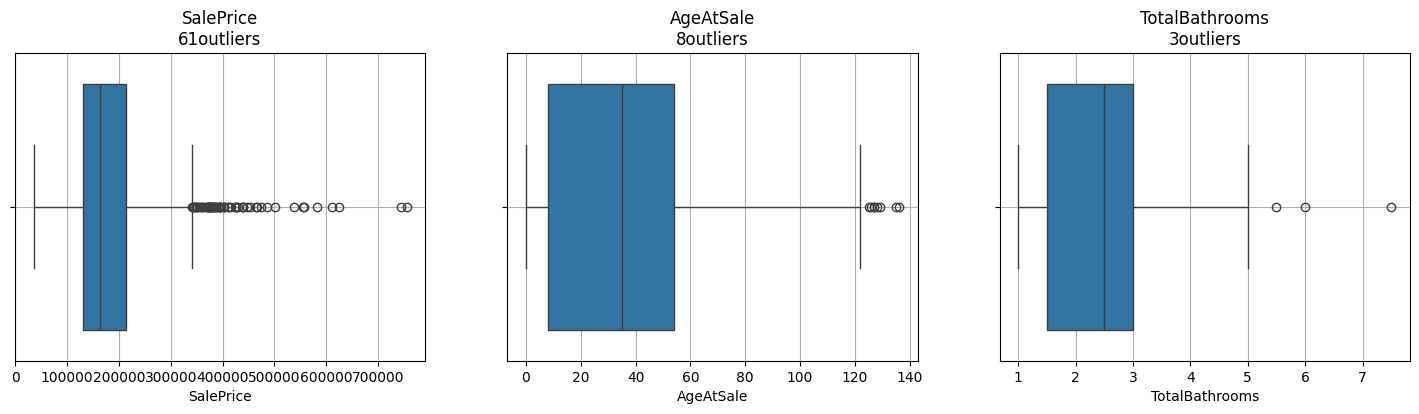

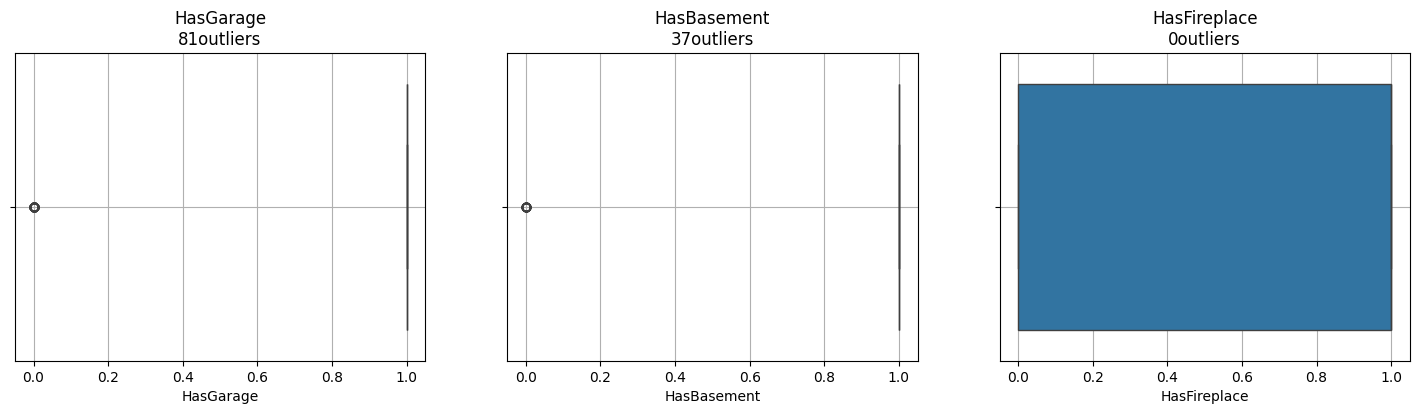

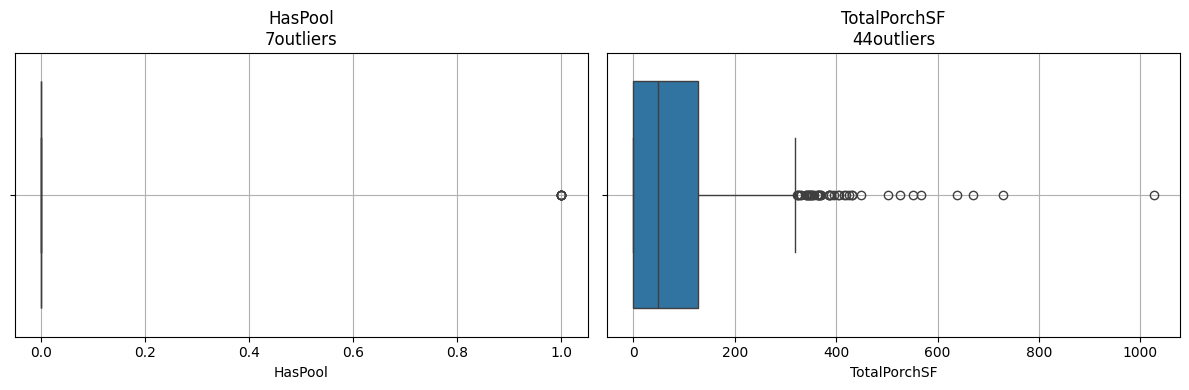

In [ ]:
cols = df.select_dtypes(include=[np.number]).columns.tolist()
detect_outliers_iqr(df,cols,threshold=1.5,cols_per_row=3)

In [ ]:
cols = df.select_dtypes(include=[np.number]).columns.tolist()
cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 '3SsnPorch',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'AgeAtSale',
 'TotalBathrooms',
 'HasGarage',
 'HasBasement',
 'HasFireplace',
 'HasPool',
 'TotalPorchSF']

In [ ]:
#Removes outliers
def remove_outliers_iqr(df,cols,threshold=1.5):

  """
  Removes outliers from specified numerical columns using IQR method.
  Parameters:
      df (DataFrame):Input DataFrame
      cols (list):List of numeric column names to clean
      threshold (float):IQR multiplier to define outlier boundaries
  Returs:
     DataFrame:DataFrame with outliers removed
   """
  original_shape = df.shape
  outlier_indices = [] # Initialize as a list
  for col in cols:
    if col not in df.columns:
      print(f"Columns'{col}'not found in DataFrame")
      continue
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    #Collect all outlier indices
    col_outliers = df[(df[col]<lower_bound)| (df[col]>upper_bound)].index
    outlier_indices.extend(col_outliers) # Use extend on the list
    #Remove duplicates and filter Dataframe
  unique_outlier_indices = list(set(outlier_indices))
  df_cleaned= df.drop(unique_outlier_indices)

  print(f"Removed{len(unique_outlier_indices)}rows contining outliers.")
  print(f"Original shapes:{original_shape},New shape:{df_cleaned.shape}")
  return df_cleaned

In [ ]:
cols =['BsmtFinSF2','KitchenAdvGr']
df_cleaned = remove_outliers_iqr(df,cols,threshold=1.5)

Columns'KitchenAdvGr'not found in DataFrame
Removed167rows contining outliers.
Original shapes:(1460, 69),New shape:(1293, 69)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd
def create_and_apply_scaler(df,numeric_cols,scaler_type='standard'):
  """
  Applies scaling to selected numeric columns in a Dataframe.
  Parameters:
     df(pd.DataFrame):Input DataFrame
     numeric_cols(list):List of column names to be scaled
     scaler_type(str):Type of scaler - 'standard' or 'minmax'.
  Returns:
      pd.DataFrame:Transformed DataFrame with all columns preserved and reordered.
    """
  if scaler_type == 'standard':
    scaler = StandardScaler()
    transformer_name = 'scaler'
  elif scaler_type == 'minmax':
    scaler = MinMaxScaler()
    transformer_name = 'minmax_scaler'
  else:
    raise ValueError("Invalid scaler_type. Choose 'standard' or 'minmax'.")
  preprocessor = ColumnTransformer(
      transformers=[(transformer_name,scaler,numeric_cols)],
      remainder='passthrough'
  )
  X_scaled = preprocessor.fit_transform(df)
  #Get list of non numeric categorical or other columns
  non_numeric_cols = df.columns.drop(numeric_cols).tolist()
  #Create new DataFrame with propercolumn names
  df_scaled = pd.DataFrame(X_scaled,columns=numeric_cols+ non_numeric_cols,index=df.index)
  #Reorder columns to match original dataframes order
  df_scaled = df_scaled[df.columns]

  return df_scaled

In [ ]:
selected_numeric_cols = ['LotArea','WoodDeckSF','GrLivArea','LotFrontage']
#Apply standard scaling
df_scaled = create_and_apply_scaler(df_cleaned,selected_numeric_cols,scaler_type='standard')
#Apply min-max scalling
print(df_scaled.head())

  MSSubClass MSZoning LotFrontage   LotArea Street LotShape LandContour  \
0       60.0       RL    -0.20845 -0.229728   Pave      Reg         Lvl   
1       20.0       RL     0.46807 -0.076286   Pave      Reg         Lvl   
2       60.0       RL   -0.073146   0.14387   Pave      IR1         Lvl   
3       70.0       RL   -0.433957 -0.082957   Pave      IR1         Lvl   
4       60.0       RL    0.648476  0.545489   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... SaleType SaleCondition SalePrice  \
0    Inside       Gtl      CollgCr  ...       WD        Normal  208500.0   
1       FR2       Gtl      Veenker  ...       WD        Normal  181500.0   
2    Inside       Gtl      CollgCr  ...       WD        Normal  223500.0   
3    Corner       Gtl      Crawfor  ...       WD       Abnorml  140000.0   
4       FR2       Gtl      NoRidge  ...       WD        Normal  250000.0   

  AgeAtSale TotalBathrooms HasGarage HasBasement HasFireplace HasPool  \
0       5.0        

In [ ]:
def one_hot_encode_dataframe(df,cols=None,drop_first=False):
  """
  performs one_hot encoding on specified or all categorical columns.
  Parameters:
     df(DataFrame):Input DataFrame
     cols (list or None):List of columns to encode. if None ,all abject/category
     dtype columns are encoded.
     drop_first (bool): Wheather to drop first category to avoid dummy variable trap.
     Returns:
        DataFrame:DataFrame with one-hot encoded columns.
  """
  df = df.copy()#avoid modifying original data
  #DEtermine which columns to encode
  if cols is None:
    #Auto-select categorical/object columns
    cols = df.select_dtypes(include=['object','category']).columns.tolist()
  if not cols:
    print("No categorical columns found to encode")
    return df
  print(f"One-hot encoding{len(cols)} columns:{cols}")
  #Perform one-hot encoding
  df_encoded = pd.get_dummies(df,columns=cols,drop_first=drop_first)
  print("One-hot encoding completed")
  return df_encoded

In [ ]:
print(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', '3SsnPorch', 'MiscVal', 'MoSold',
       'SaleType', 'SaleCondition', 'SalePrice', 'AgeAtSale', 'TotalBathrooms',
       'HasGarage', 'Has

In [ ]:
categorical_cols =['MSZoning','Street','LotShape','LandContour','LotConfig','RoofMatl','Exterior1st',
                   'Exterior2nd','MasVnrType','LandSlope','Neighborhood','Condition1','Condition2','BldgType','YearRemodAdd', 'RoofStyle',
                   'HouseStyle','ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                   'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional', 'GarageType','GarageFinish',
                   'GarageQual','GarageCond','PavedDrive','SaleType', 'SaleCondition']
#apply one-hot encoding
df_encoded=one_hot_encode_dataframe(df_scaled,cols=categorical_cols,drop_first=True)


One-hot encoding38 columns:['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'YearRemodAdd', 'RoofStyle', 'HouseStyle', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
One-hot encoding completed


In [ ]:
df_encoded.to_csv('scaled.csv')

In [ ]:
#split into feature and target
x = df_encoded.drop('SalePrice',axis=1)#all the columns expect salesprice
y = df_encoded['SalePrice']#targeted columns like saleprice

#Train/Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)#0.2 means 20% for testing and 80% for training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
def select_and_train_model(X_train,y_train,model_name='modelname'):#y_train target variable what we want to predict
  """
  Select and train a regression model based on the give name
  Parameters:
      X_train (DataFrame or array): Training features
      y_train (Series or array) : Target variable
      model_name(str):Name of the model to train.Options:
                      'RandomForest','LinearRegression','DecisionTree','SVR'
  Returns:
      model:Trained regression model
  """
  print(f"Training{model_name} model")
  if model_name =='RandomForest':
    model = RandomForestRegressor(random_state=42)
  elif model_name == 'LinearRegression':
    model = LinearRegression()
  elif model_name == 'DecisionTree':
    model = DecisionTreeRegressor(random_state=42)
  elif model_name =='SVR':
    model = SVR()
  else:
    raise ValueError(f"Unknown model:{model_name}." "Choose from: randomForest,LinearRegression,DecisionTree,SVR")

  #Train the model
  model.fit(X_train,y_train)#actully train the model using training data
  print("Model trained successfully.")
  return model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#Function to evaluate model perfornce
def evaluate_model(y_true,y_pred):
  """
  Evaluates regression model using common metrics.
  Parameters:
      y_true(array-like):True target values
      y_pred(array-like):Predicted target values
  """
  mae = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true,y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true,y_pred)

  print(f"Mean Absolute Error(MAE):{mae:.2f}")
  print(f"Mean Squared Error(MSE):{mse:.2f}")
  print(f"Root Mean Squared Error(RMSE):{rmse:.2f}")
  print(f"R^2 score:{r2:.4f}")

trained_model = select_and_train_model(x_train,y_train,model_name='LinearRegression')
y_pred = trained_model.predict(x_test)
print("Model Evaluation:")
evaluate_model(y_test,y_pred)

TrainingLinearRegression model
Model trained successfully.
Model Evaluation:
Mean Absolute Error(MAE):25566.80
Mean Squared Error(MSE):4780187960.82
Root Mean Squared Error(RMSE):69138.90
R^2 score:0.2985
